## 1. IMPORT ALL LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

## 2. LOAD THE DATASET

In [2]:
# Read datasets
data = pd.read_csv('../Monthly and Annualy/Deneba Station Monthly Climate Data 1993-2022.csv')
data.head()

Parameter  YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL  \
0  Relative Humidity  1993  66.62  62.25  52.62  73.75  77.12  85.50  87.88   
1  Relative Humidity  1994  50.38  45.62  59.50  65.38  72.25  85.25  87.69   
2  Relative Humidity  1995  44.75  60.69  63.69  71.06  72.62  78.81  86.50   
3  Relative Humidity  1996  67.88  52.62  67.81  74.56  76.31  85.44  88.25   
4  Relative Humidity  1997  64.88  42.00  55.06  74.12  76.75  83.88  86.94   

     AUG    SEP    OCT    NOV    DEC    ANN  
0  85.88  82.94  79.50  67.56  59.94  73.50  
1  87.12  83.25  71.00  66.38  58.62  69.50  
2  86.38  82.06  75.31  63.94  67.75  71.19  
3  86.81  85.12  74.62  68.25  60.56  74.06  
4  85.19  82.31  82.19  79.44  72.50  73.94

In [3]:
# rename the parameter
data.rename(columns={'Parameters':'Parameter', 'Year':'YEAR'}, inplace=True)
data.head()

Parameter  YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL  \
0  Relative Humidity  1993  66.62  62.25  52.62  73.75  77.12  85.50  87.88   
1  Relative Humidity  1994  50.38  45.62  59.50  65.38  72.25  85.25  87.69   
2  Relative Humidity  1995  44.75  60.69  63.69  71.06  72.62  78.81  86.50   
3  Relative Humidity  1996  67.88  52.62  67.81  74.56  76.31  85.44  88.25   
4  Relative Humidity  1997  64.88  42.00  55.06  74.12  76.75  83.88  86.94   

     AUG    SEP    OCT    NOV    DEC    ANN  
0  85.88  82.94  79.50  67.56  59.94  73.50  
1  87.12  83.25  71.00  66.38  58.62  69.50  
2  86.38  82.06  75.31  63.94  67.75  71.19  
3  86.81  85.12  74.62  68.25  60.56  74.06  
4  85.19  82.31  82.19  79.44  72.50  73.94

## 3. TRANSFORM THE DATASET

In [4]:
def transform_data(df):
    melted_df = df.melt(id_vars=["Parameter", "YEAR"],
                        value_vars=["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
                        var_name="Month", value_name="Value")
    month_mapping = {
        "JAN": "01", "FEB": "02", "MAR": "03", "APR": "04", "MAY": "05", "JUN": "06",
        "JUL": "07", "AUG": "08", "SEP": "09", "OCT": "10", "NOV": "11", "DEC": "12"
    }
    melted_df["Month"] = melted_df["Month"].map(month_mapping)
    melted_df["Date"] = pd.to_datetime(melted_df["YEAR"].astype(str) + "-" + melted_df["Month"] + "-01")
    transformed_df = melted_df[["Parameter", "Date", "Value"]]
    # print(pd.DataFrame(transformed_df))
    return transformed_df

In [5]:
# Transform the data
transformed_data = transform_data(data)

In [6]:
transformed_data.head()

Parameter       Date  Value
0  Relative Humidity 1993-01-01  66.62
1  Relative Humidity 1994-01-01  50.38
2  Relative Humidity 1995-01-01  44.75
3  Relative Humidity 1996-01-01  67.88
4  Relative Humidity 1997-01-01  64.88

In [7]:
# UNIQUE VALUES ONLY
unique_parameters = transformed_data['Parameter'].unique()

In [8]:
# RENAMA THE PARAMETERS
rename_dict = {
    unique_parameters[0]: 'Relative Humidity',
    unique_parameters[1]: 'Max Temperature',
    unique_parameters[2]: 'Min Temperature',
    unique_parameters[3]: 'Max Windspeed',
    unique_parameters[4]: 'Min Windspeed',
    unique_parameters[5]: 'Precipitation',
    unique_parameters[6]: 'Solar Radiation'
}

# Renaming the parameters
transformed_data['Parameter'] = transformed_data['Parameter'].replace(rename_dict)
transformed_data.head()

Parameter       Date  Value
0  Relative Humidity 1993-01-01  66.62
1  Relative Humidity 1994-01-01  50.38
2  Relative Humidity 1995-01-01  44.75
3  Relative Humidity 1996-01-01  67.88
4  Relative Humidity 1997-01-01  64.88

In [9]:
# Parameter counts
transformed_data.Parameter.value_counts()

Parameter
Relative Humidity    360
Max Temperature      360
Min Temperature      360
Max Windspeed        360
Min Windspeed        360
Precipitation        360
Solar Radiation      360
Name: count, dtype: int64

## 4. PLOT VALUES OF EACH PARAMETERS

In [10]:
parameters = transformed_data['Parameter'].unique()
parameters

array(['Relative Humidity', 'Max Temperature', 'Min Temperature',
       'Max Windspeed', 'Min Windspeed', 'Precipitation',
       'Solar Radiation'], dtype=object)

In [11]:
# Temperature, max and min
temp_param = parameters[1:3]
wind_param = parameters[3:5]

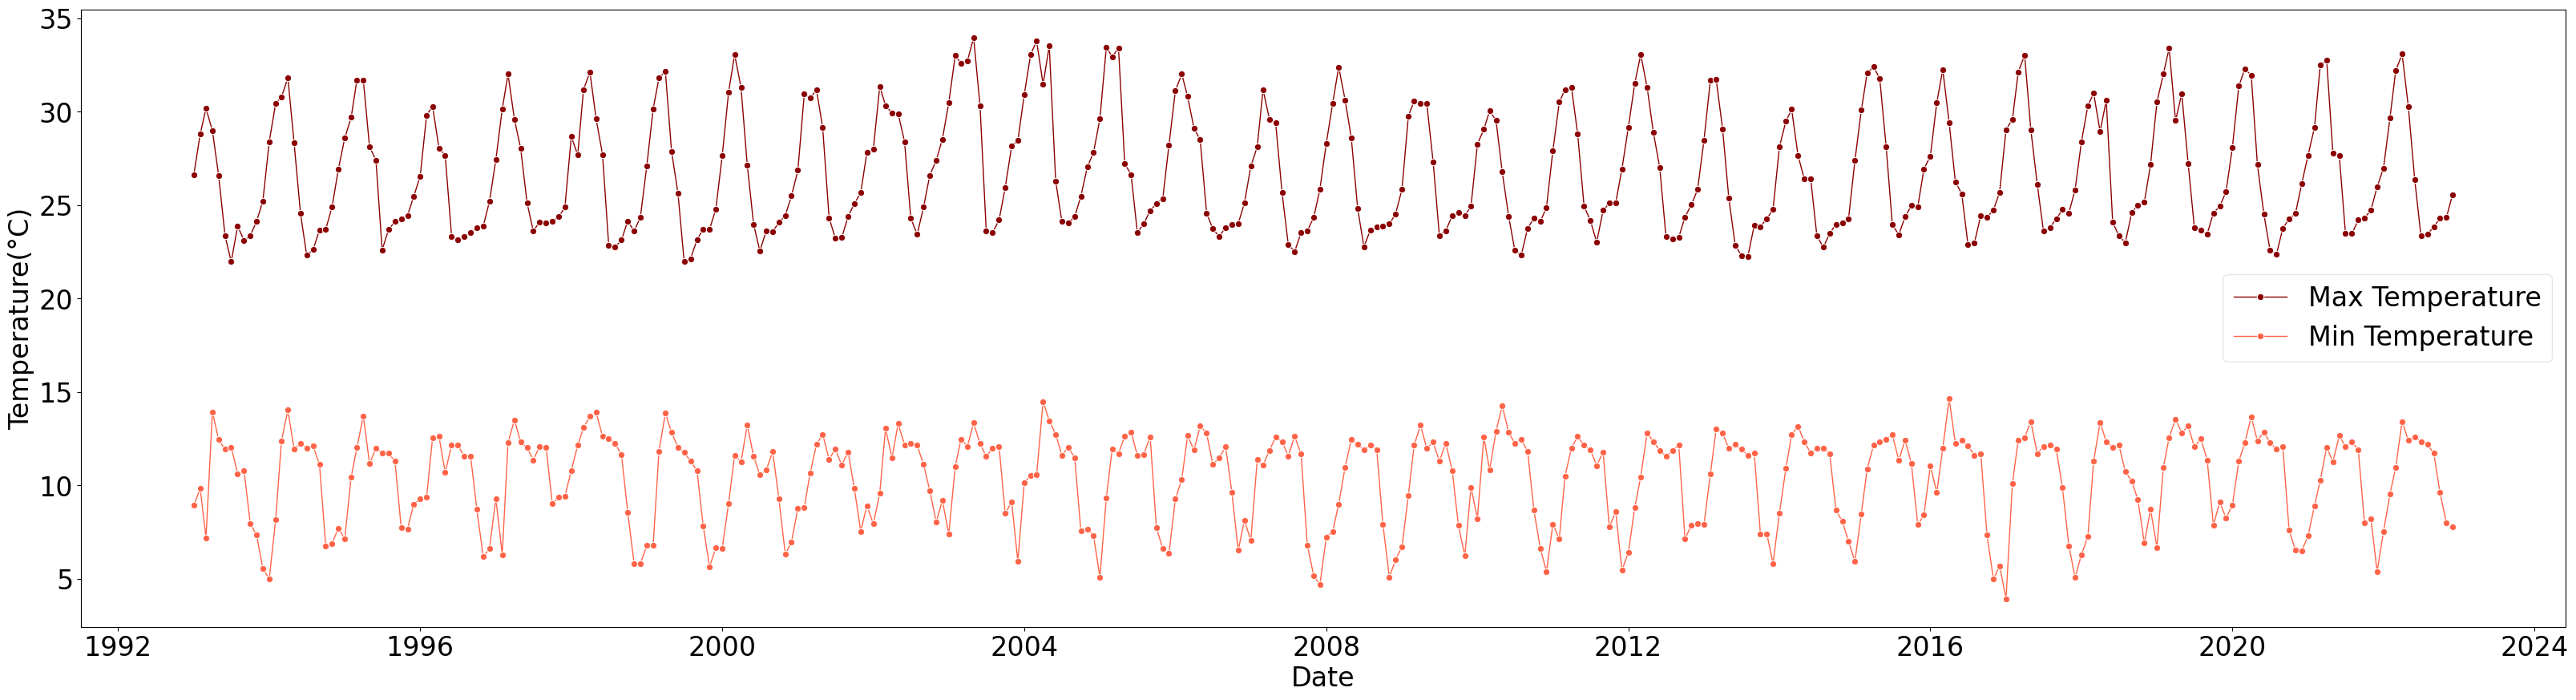

In [12]:
temp_custom_colors = {
    temp_param[0]: '#8b0000',
    temp_param[1]: '#ff6347',
}

plt.figure(figsize=(40, 10))

for parameter in temp_param:
    parameter_data = transformed_data[transformed_data['Parameter'] == parameter]
    parameter_data.set_index('Date', inplace=True)
    sns.lineplot(data=parameter_data, 
                 x=parameter_data.index, 
                 y='Value', 
                 marker='o', 
                 label=parameter, 
                 linewidth=1, 
                 color=temp_custom_colors[parameter])

# plt.title('Monthly Analysis', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Temperature(°C)', fontsize=24)
plt.legend(loc='best', fontsize=24, framealpha=0.5) 
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

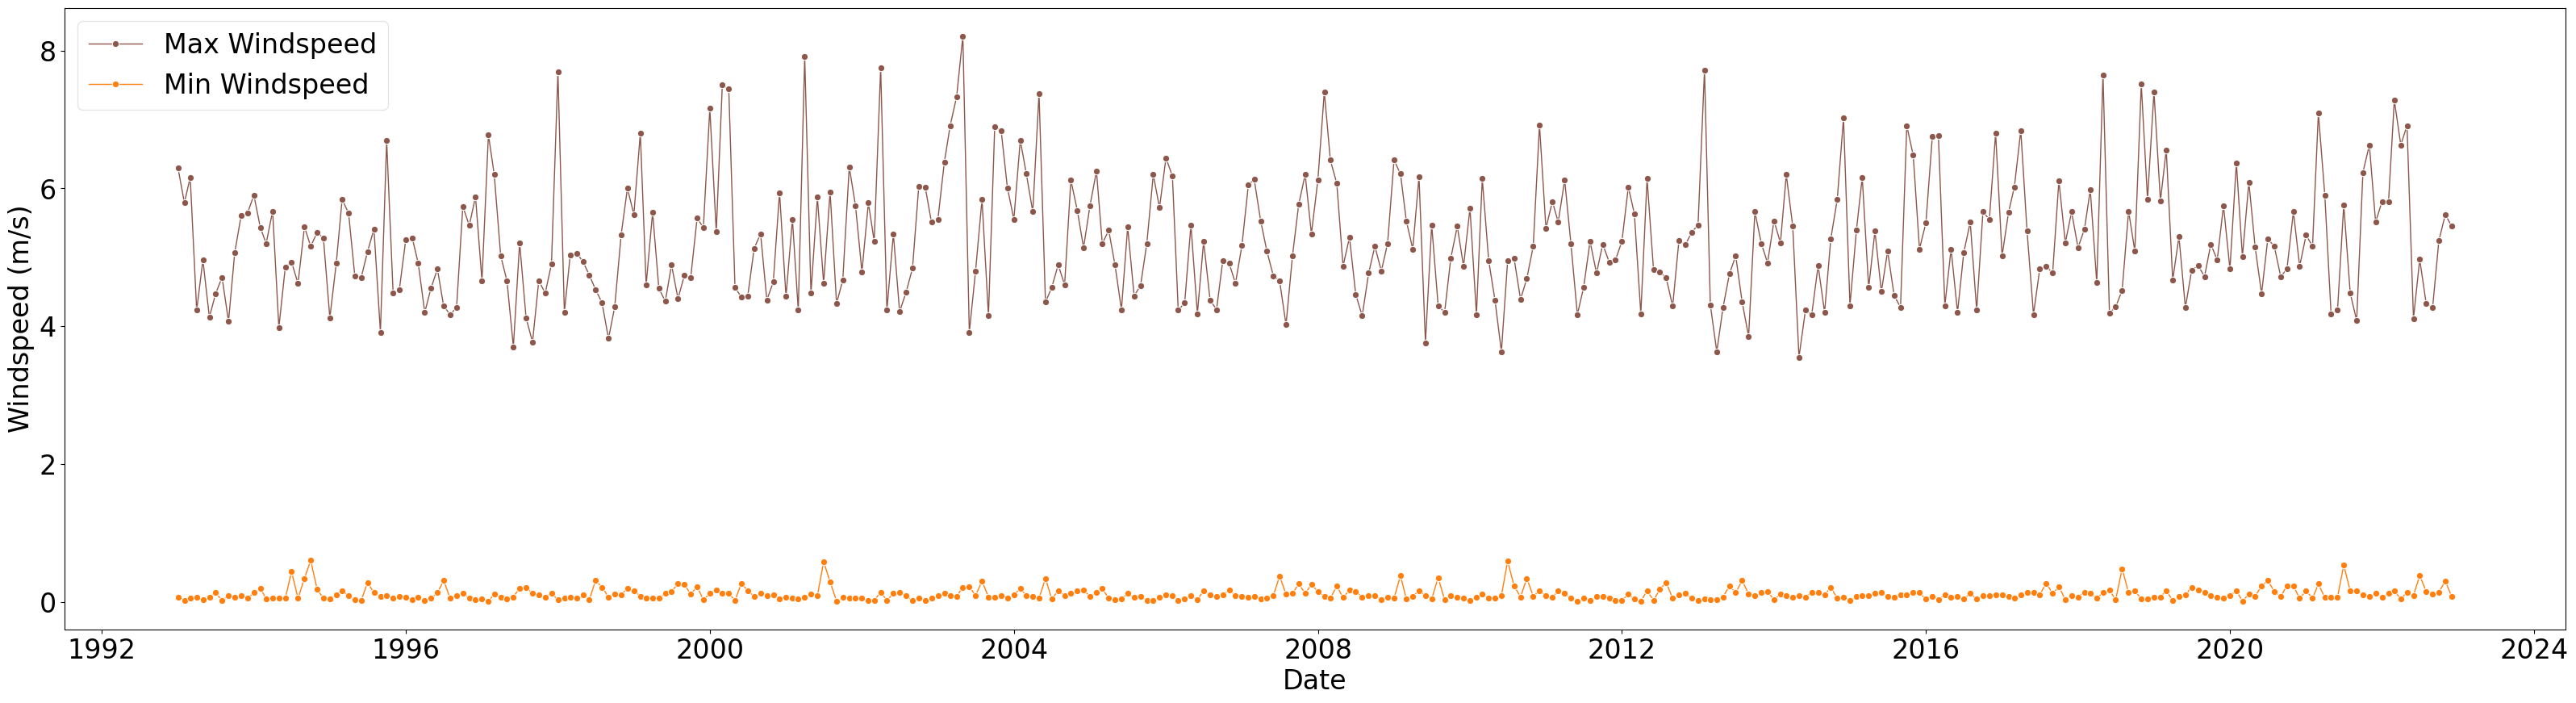

In [13]:
wind_custom_colors = {
    wind_param[0]: '#8c564b',
    wind_param[1]: '#ff7f0e',
}

plt.figure(figsize=(40, 10))

for parameter in wind_param:
    parameter_data = transformed_data[transformed_data['Parameter'] == parameter]
    parameter_data.set_index('Date', inplace=True)
    sns.lineplot(data=parameter_data, 
                 x=parameter_data.index, 
                 y='Value', 
                 marker='o', 
                 label=parameter, 
                 linewidth=1, 
                 color=wind_custom_colors[parameter])

# plt.title('Monthly Analysis', fontsize=24)
plt.xlabel('Date', fontsize=24)
plt.ylabel('Windspeed (m/s)', fontsize=24)
plt.legend(loc='best', fontsize=24, framealpha=0.5) 
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

## 5. FIND THE CORRELATIONS BETWEEN EACH PARAMETERS

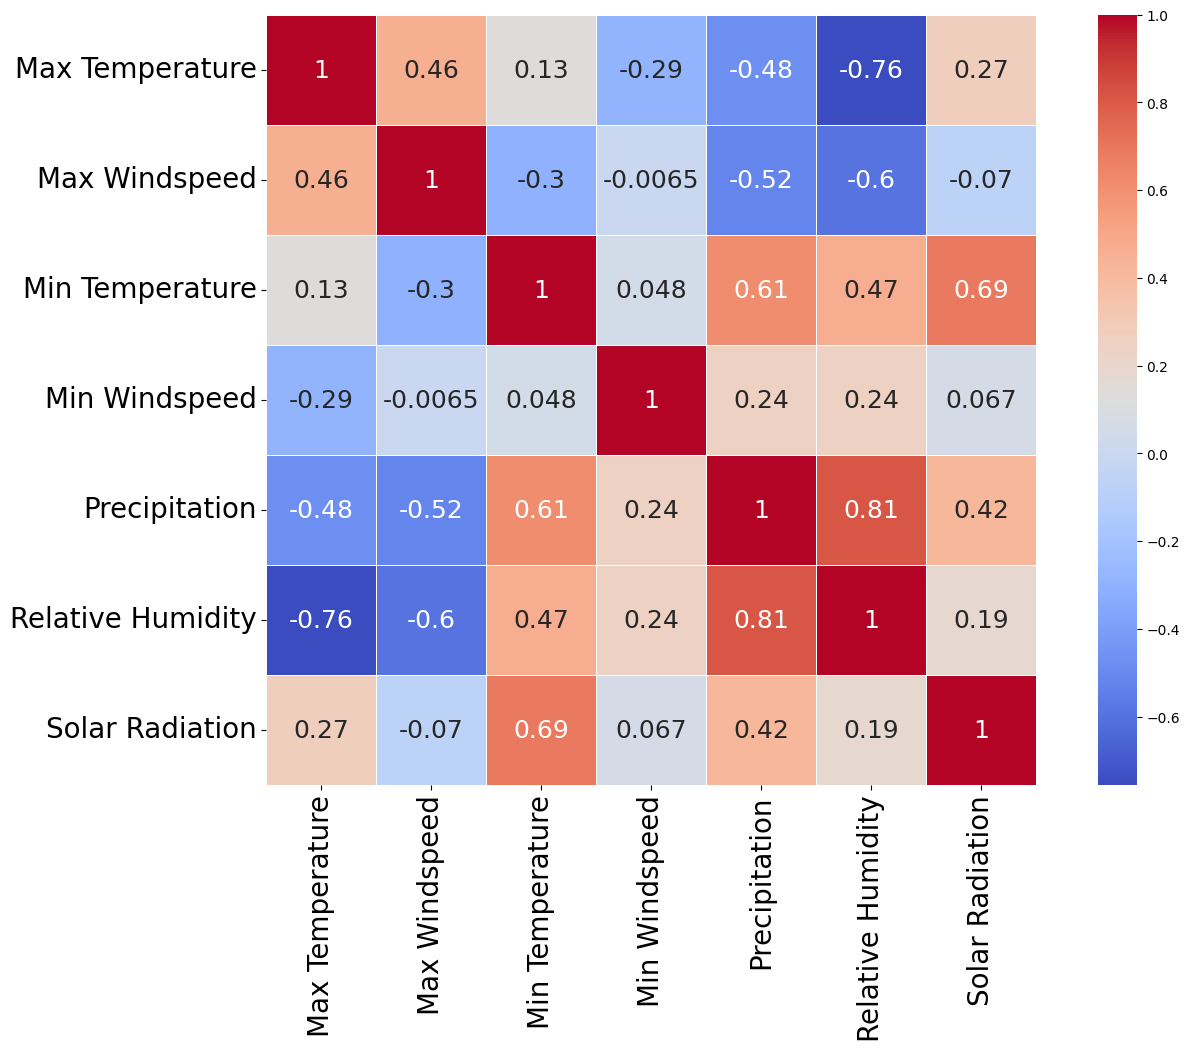

In [14]:
pivot_data = transformed_data.pivot(index='Date', columns='Parameter', values='Value')
correlation_matrix = pivot_data.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5, annot_kws={"size": 18})

plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

plt.xlabel('')
plt.ylabel('')
plt.show()

## 6. COMMON FUNCTION

### TIME SERIES TO SUPERVISED

In [15]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = []
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = pd.concat(cols, axis=1)
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

### ADD ROLLING FEATURES

In [16]:
def add_rolling_features(data, window=3):
    df = pd.DataFrame(data)
    df['rolling_mean'] = df.iloc[:, 0].rolling(window=window).mean()
    df['rolling_std'] = df.iloc[:, 0].rolling(window=window).std()
    df.dropna(inplace=True)
    return df

### TRAIN TEST SPLITT

In [17]:
def train_test_split(data, train_size=0.9):
    n_train = int(len(data) * train_size)
    return data[:n_train], data[n_train:]

### MEASURING METRICS

In [18]:
def nash_sutcliffe_efficiency(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
def willmotts_index(y_true, y_pred):
    return 1 - (np.sum((y_pred - y_true)**2) / np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true)))**2))


### CROSS VALIDATION AND MODEL EVALUATIONS

In [19]:
def walk_forward_validation(data, model):
    predictions = []
    train, test = train_test_split(data)
    history = [x for x in train.values]
    for i in range(len(test)):
        testX, testy = test.iloc[i, :-1].values, test.iloc[i, -1]
        yhat = model(history, testX)
        predictions.append(yhat)
        history.append(test.iloc[i].values)
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    mae = mean_absolute_error(test.iloc[:, -1], predictions)
    rmse = np.sqrt(np.mean((test.iloc[:, -1] - np.asarray(predictions))**2))
    r2 = r2_score(test.iloc[:, -1], predictions)
    nse = nash_sutcliffe_efficiency(test.iloc[:, -1], predictions)
    willmott = willmotts_index(test.iloc[:, -1], predictions)
    return mae, rmse, r2, nse, willmott, test.index, test.iloc[:, -1], predictions

## 7. MODELS


### 1. RANDOM FOREST

In [20]:
def random_forest_forecast(train, testX):
    train = np.asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=50)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

### 2. SVM

In [21]:
from sklearn.svm import SVR
def svm_forecast(train, testX):
    train = np.asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = SVR(kernel='rbf')
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]


### 3. XGBRegressor

In [22]:
from xgboost import XGBRegressor
def xgboost_forecast(train, testX):
    train = np.asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = XGBRegressor(n_estimators=50)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]


### 4. LGBMRegressor


In [23]:
from lightgbm import LGBMRegressor
def lightgbm_forecast(train, testX):
    train = np.asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = LGBMRegressor(n_estimators=50, verbose=-1)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]


In [24]:
# Color dictionary for different models
colors_dict = {
    'LightGBM': '#27ad81',
    'XGBoost': '#5dc863',
    'SVM': '#aadc32',
    'Random Forest': '#fde725'
}

## 6. HUMIDITY ANALYSIS

In [25]:
# Get the humidity values
humidity = transformed_data[transformed_data['Parameter'] == parameters[0]]
humidity.head()

Parameter       Date  Value
0  Relative Humidity 1993-01-01  66.62
1  Relative Humidity 1994-01-01  50.38
2  Relative Humidity 1995-01-01  44.75
3  Relative Humidity 1996-01-01  67.88
4  Relative Humidity 1997-01-01  64.88

In [26]:
# drop the parameter columns
humidity = humidity.drop(columns=['Parameter'])

In [27]:
humidity.head()

Date  Value
0 1993-01-01  66.62
1 1994-01-01  50.38
2 1995-01-01  44.75
3 1996-01-01  67.88
4 1997-01-01  64.88

In [28]:
# sort according to  the date
humidity= humidity.sort_values(by='Date')
humidity.head()

Date  Value
0   1993-01-01  66.62
210 1993-02-01  62.25
420 1993-03-01  52.62
630 1993-04-01  73.75
840 1993-05-01  77.12

In [29]:
humidity.head()

Date  Value
0   1993-01-01  66.62
210 1993-02-01  62.25
420 1993-03-01  52.62
630 1993-04-01  73.75
840 1993-05-01  77.12

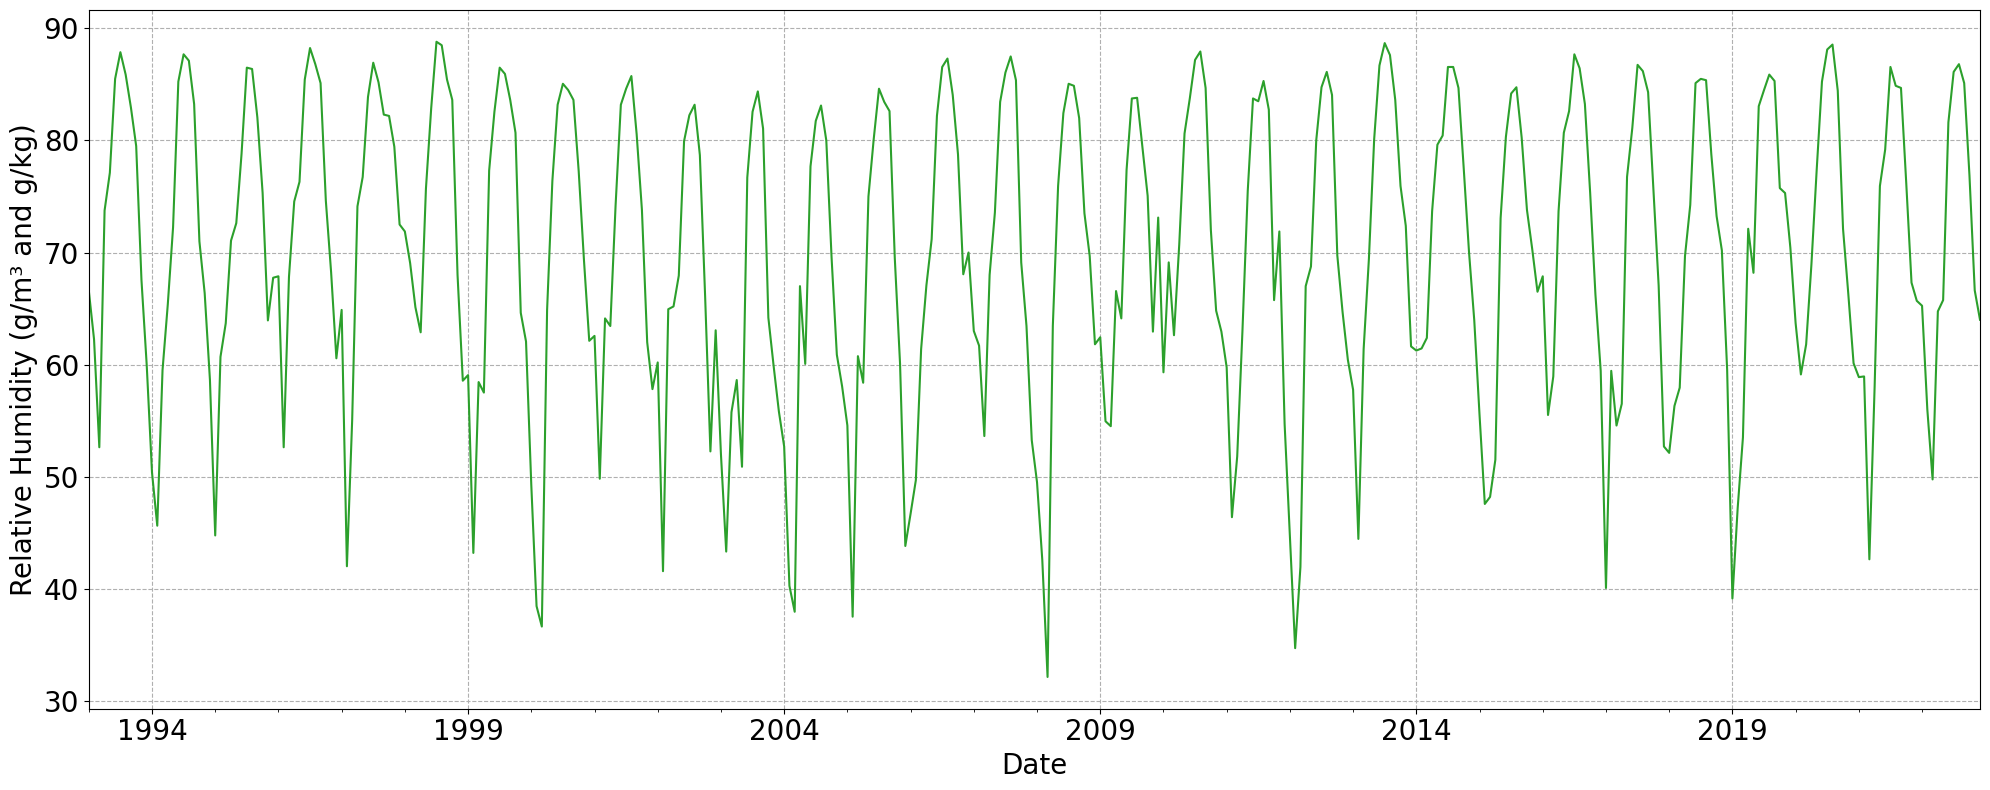

In [30]:
plt.figure(figsize=(20, 8))
humidity.plot(x='Date', y='Value', kind='line', ax=plt.gca(), color='#2ca02c', fontsize=12)
plt.xlabel('Date', fontdict={'fontsize':20})
plt.ylabel('Relative Humidity (g/m³ and g/kg)', fontdict={'fontsize':20})
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(linestyle='--')
plt.tight_layout()
plt.legend().remove()
plt.show()

In [31]:
# Add fuller test to check the stationarity of the dataset
def adfuller_test(values):
    result = adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0)")
    else:
        print("Weak evidence against the null hypothesis(H0)")

In [32]:
# H0: It is non stationary
# H1: It is stationary

In [33]:
adfuller_test(humidity['Value'])

ADF Test Statistic : -3.73671664488671
p-value : 0.0036253618172698713
#Lags Used : 13
Number of Observations Used : 346
Strong evidence against the null hypothesis(H0)


In [34]:
humidity = humidity[['Date', 'Value']]
humidity.set_index('Date', inplace=True)
humidity.head()

Value
Date             
1993-01-01  66.62
1993-02-01  62.25
1993-03-01  52.62
1993-04-01  73.75
1993-05-01  77.12

In [35]:
model_names = []
mae_values = []
rmse_values = []
r2_values = []
nse_values = []
willmott_values = []

### TRAIN THE MODEL

In [36]:
# Assuming `humidity` is your time series DataFrame
series = humidity
values = series.values
values = add_rolling_features(values, window=3)
values = pd.DataFrame(values).values
scaler = StandardScaler()
values = scaler.fit_transform(values)
data = series_to_supervised(values, n_in=6)
data_df = pd.DataFrame(data, index=series.index[6+2:])

>expected=-0.2, predicted=-0.5
>expected=-0.3, predicted=-0.3
>expected=-1.2, predicted=-0.9
>expected=-0.4, predicted=-0.4
>expected=0.3, predicted=0.4
>expected=0.4, predicted=0.3
>expected=-0.3, predicted=-0.8
>expected=-1.3, predicted=-1.2
>expected=-1.2, predicted=-1.2
>expected=0.5, predicted=-0.1
>expected=0.7, predicted=0.8
>expected=-0.2, predicted=0.1
>expected=-0.7, predicted=-1.0
>expected=-1.6, predicted=-0.7
>expected=0.7, predicted=0.4
>expected=0.6, predicted=1.2
>expected=2.6, predicted=1.9
>expected=1.2, predicted=1.2
>expected=-0.3, predicted=-0.1
>expected=-0.8, predicted=-0.8
>expected=-1.5, predicted=-1.4
>expected=-0.5, predicted=-0.6
>expected=0.5, predicted=0.4
>expected=-0.3, predicted=0.1
>expected=-1.5, predicted=-1.0
>expected=-0.3, predicted=-0.4
>expected=0.3, predicted=0.0
>expected=0.2, predicted=0.5
>expected=0.6, predicted=0.1
>expected=0.7, predicted=0.2
>expected=1.0, predicted=0.6
>expected=-1.0, predicted=-1.1
>expected=-1.5, predicted=-1.5
>expec

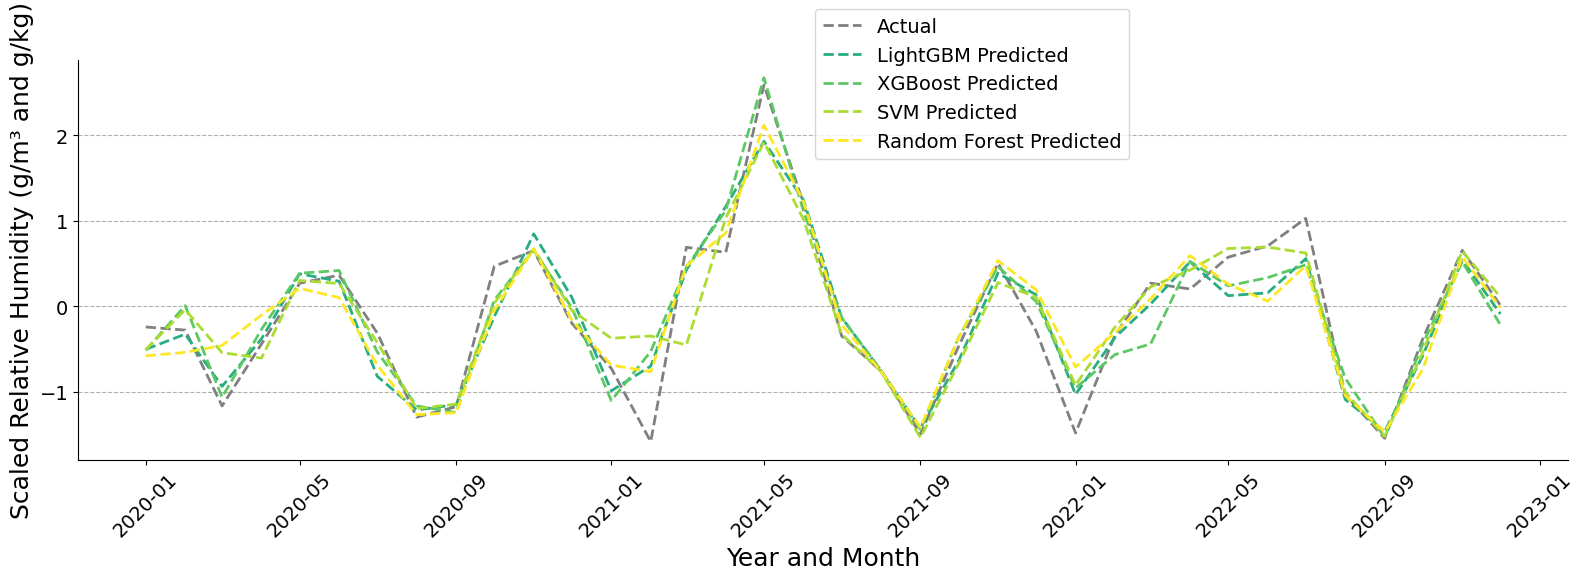

In [37]:

# Model names
models = [
    ('LightGBM', lightgbm_forecast),
    ('XGBoost', xgboost_forecast),
    ('SVM', svm_forecast),
    ('Random Forest', random_forest_forecast)
]

# Clear existing lists in case they contain previous values
model_names.clear()
mae_values.clear()
rmse_values.clear()
r2_values.clear()
nse_values.clear()
willmott_values.clear()

# Iterate over each model, perform walk-forward validation, and append metrics to lists
for model_name, model_func in models:
    mae, rmse, r2, nse, willmott, test_index, y, yhat = walk_forward_validation(data_df, model_func)
    
    model_names.append(model_name)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)
    nse_values.append(nse)
    willmott_values.append(willmott)

# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics_df = pd.DataFrame(metrics)

# Plot the actual vs predicted values for each model
plt.figure(figsize=(16, 6))
plt.plot(test_index, y, label='Actual', linestyle='--', color='gray', linewidth=2)

# Plot predictions for each model
for model_name, model_func in models:
    _, _, _, _, _, test_index, _, yhat = walk_forward_validation(data_df, model_func)
    plt.plot(test_index, yhat, label=f'{model_name} Predicted', linestyle='--', color=colors_dict[model_name], linewidth=2)

plt.xlabel('Year and Month', fontsize=18)
plt.ylabel('Scaled Relative Humidity (g/m³ and g/kg)', fontsize=18)
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.6, 1.15), ncol=1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### EVALUATE THE MODEL

In [38]:
# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics = pd.DataFrame(metrics)

In [39]:
metrics

Model       MAE      RMSE  R-squared  Nash-Sutcliffe Efficiency  \
0       LightGBM  0.255154  0.331828   0.863333                   0.863333   
1        XGBoost  0.243259  0.325387   0.868587                   0.868587   
2            SVM  0.247012  0.380875   0.819947                   0.819947   
3  Random Forest  0.255163  0.325588   0.868425                   0.868425   

   Willmott's Index of Agreement  
0                       0.959804  
1                       0.963614  
2                       0.944881  
3                       0.959468

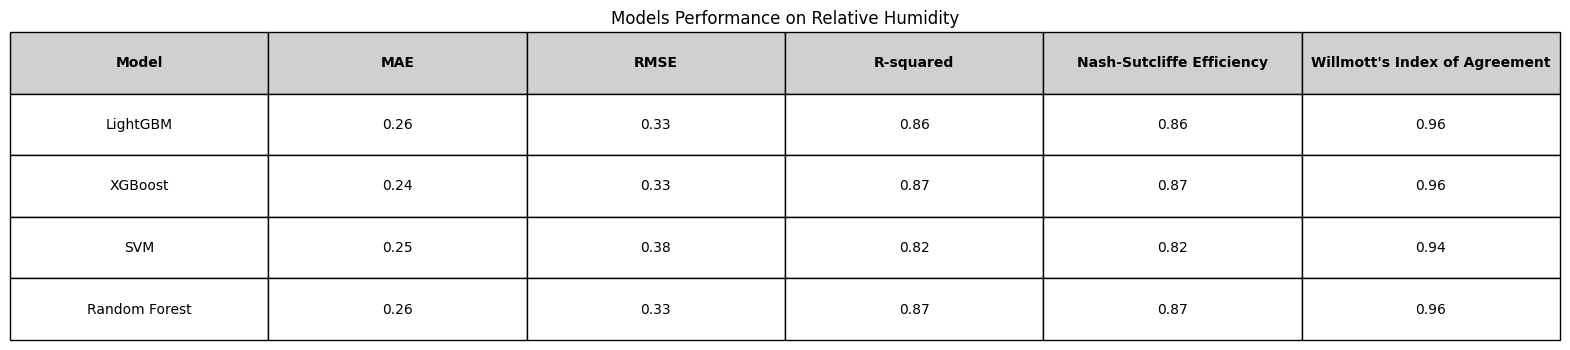

In [40]:
metrics = metrics.round(2)

fig, ax = plt.subplots(figsize=(20, 4))
ax.axis('off')

table = ax.table(cellText=metrics.values,
                 colLabels=metrics.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

header_color = '#D0D0D0'
data_color = '#FFFFFF'

for i, key in enumerate(table._cells):
    cell = table._cells[key]
    cell.set_edgecolor('black')
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(weight='bold')
        cell.set_facecolor(header_color)
    else:
        cell.set_facecolor(data_color)

plt.title('Models Performance on Relative Humidity')
plt.show()


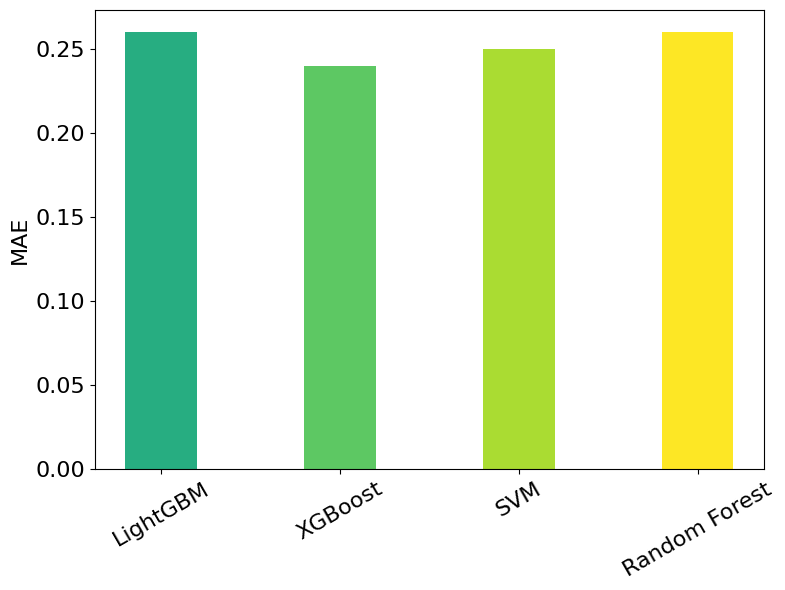

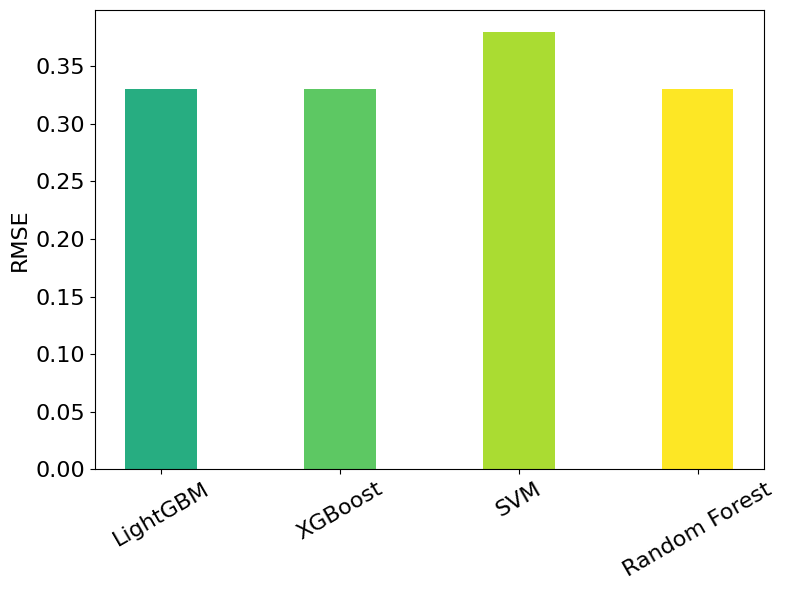

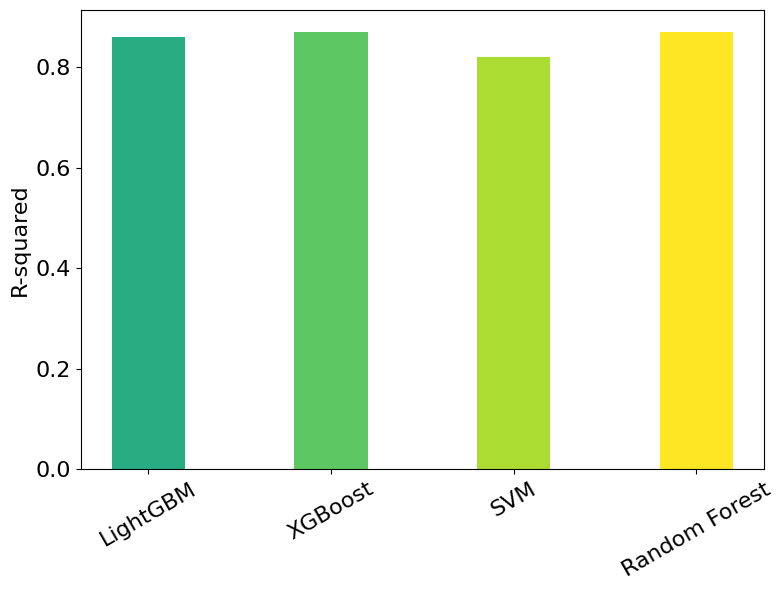

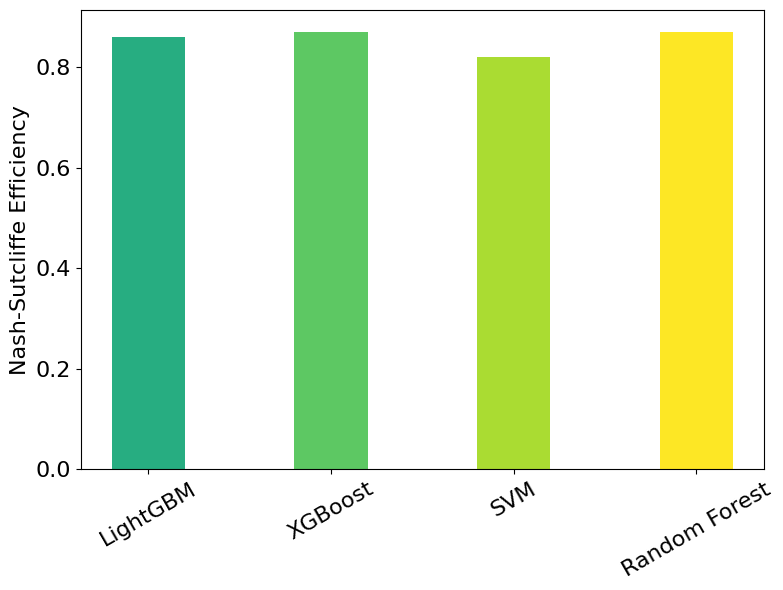

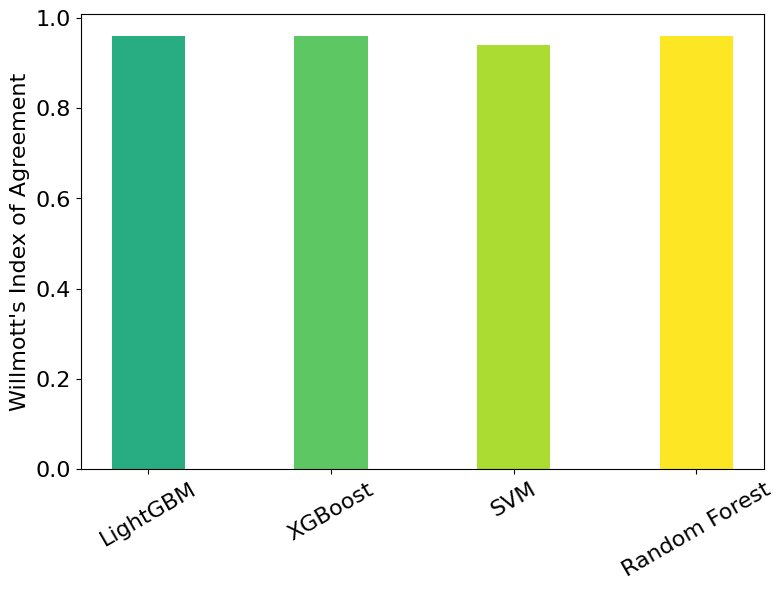

In [41]:

colors = ['#27ad81', '#5dc863', '#aadc32', '#fde725']
bar_width = 0.4

# Metrics and Titles
metrics_title = {
    'MAE': 'Mean Absolute Error (MAE)',
    'RMSE': 'Root Mean Squared Error (RMSE)',
    'R-squared': 'R-squared',
    'Nash-Sutcliffe Efficiency': 'Nash-Sutcliffe Efficiency',
    'Willmott\'s Index of Agreement': 'Willmott\'s Index of Agreement'
}

# Plot each metric separately
for metric, title in metrics_title.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(metrics['Model'], metrics[metric], color=colors, width=bar_width)
    # ax.set_title(title, fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.tick_params(axis='x', rotation=30, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.tight_layout()
    plt.show()


## 7. MAX TEMPERATURE ANALYSIS

In [42]:
temp_max = transformed_data[transformed_data['Parameter'] == parameters[1]]

In [43]:
# drop the parameter columns
temp_max = temp_max.drop(columns=['Parameter'])

In [44]:
temp_max.head()

Date  Value
30 1993-01-01  26.63
31 1994-01-01  28.40
32 1995-01-01  28.58
33 1996-01-01  26.54
34 1997-01-01  27.42

In [45]:
# sort according to  the date
temp_max= temp_max.sort_values(by='Date')
temp_max.head()

Date  Value
30  1993-01-01  26.63
240 1993-02-01  28.81
450 1993-03-01  30.17
660 1993-04-01  28.98
870 1993-05-01  26.59

In [46]:
temp_max.head()

Date  Value
30  1993-01-01  26.63
240 1993-02-01  28.81
450 1993-03-01  30.17
660 1993-04-01  28.98
870 1993-05-01  26.59

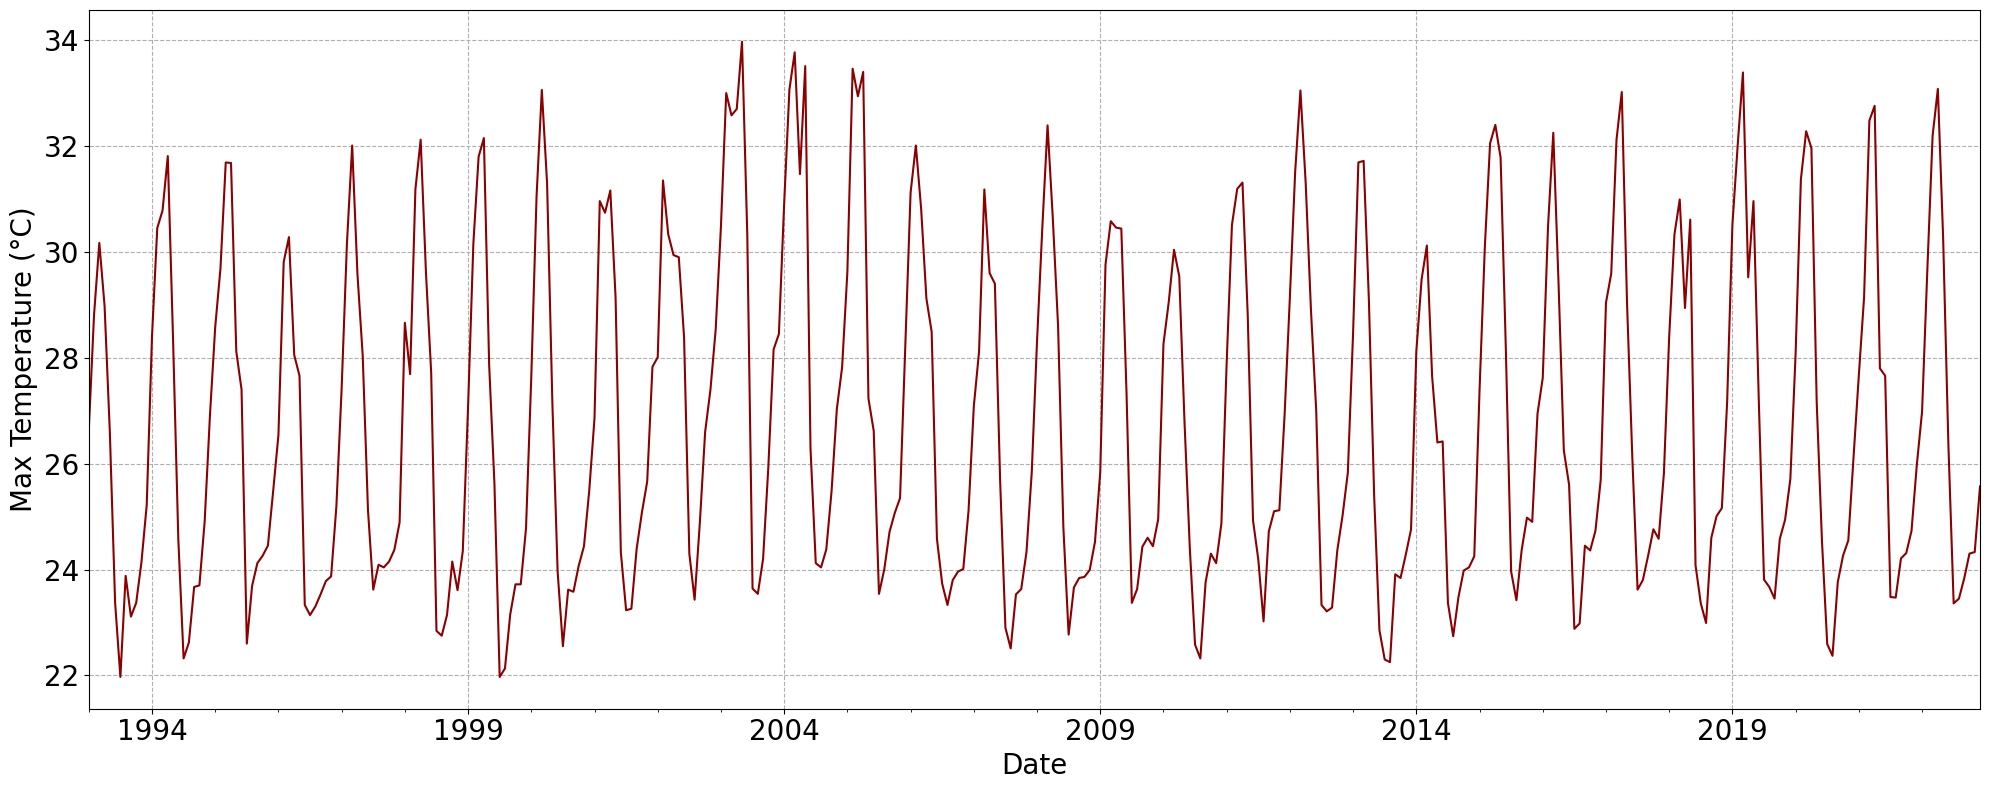

In [47]:
plt.figure(figsize=(20, 8))
temp_max.plot(x='Date', y='Value', kind='line', ax=plt.gca(), color='#8b0000', fontsize=12)
plt.xlabel('Date', fontdict={'fontsize':20})
plt.ylabel('Max Temperature (°C)', fontdict={'fontsize':20})
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(linestyle='--')
plt.tight_layout()
plt.legend().remove()
plt.show()

In [48]:
# Add fuller test to check the stationarity of the dataset
def adfuller_test(values):
    result = adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0)")
    else:
        print("Weak evidence against the null hypothesis(H0)")

In [49]:
# H0: It is non stationary
# H1: It is stationary

In [50]:
adfuller_test(temp_max['Value'])

ADF Test Statistic : -2.8965871123547284
p-value : 0.04574631171231666
#Lags Used : 13
Number of Observations Used : 346
Strong evidence against the null hypothesis(H0)


In [51]:
temp_max = temp_max[['Date', 'Value']]
temp_max.set_index('Date', inplace=True)
temp_max.head()

Value
Date             
1993-01-01  26.63
1993-02-01  28.81
1993-03-01  30.17
1993-04-01  28.98
1993-05-01  26.59

### TRAIN THE MODEL

In [52]:
# Assuming `temp_max` is your time series DataFrame
series = temp_max
values = series.values
values = add_rolling_features(values, window=3)
values = pd.DataFrame(values).values
scaler = StandardScaler()
values = scaler.fit_transform(values)
data = series_to_supervised(values, n_in=6)
data_df = pd.DataFrame(data, index=series.index[6+2:])

>expected=0.1, predicted=-0.3
>expected=1.3, predicted=1.1
>expected=0.7, predicted=0.7
>expected=-1.1, predicted=-0.5
>expected=1.3, predicted=0.7
>expected=2.2, predicted=2.1
>expected=0.8, predicted=0.7
>expected=-0.3, predicted=-0.9
>expected=-0.8, predicted=-0.7
>expected=-0.6, predicted=-0.8
>expected=-1.1, predicted=-1.2
>expected=-0.5, predicted=-0.8
>expected=0.0, predicted=0.5
>expected=-0.0, predicted=0.4
>expected=0.9, predicted=0.6
>expected=0.5, predicted=0.5
>expected=1.2, predicted=0.7
>expected=1.4, predicted=1.1
>expected=0.9, predicted=1.0
>expected=0.9, predicted=0.4
>expected=-1.1, predicted=-1.1
>expected=-1.1, predicted=-1.2
>expected=-1.3, predicted=-1.3
>expected=-0.7, predicted=-0.8
>expected=-0.4, predicted=0.1
>expected=0.4, predicted=0.5
>expected=1.1, predicted=1.0
>expected=0.2, predicted=0.4
>expected=-0.1, predicted=-0.5
>expected=1.8, predicted=1.7
>expected=1.9, predicted=2.0
>expected=0.2, predicted=0.4
>expected=-1.3, predicted=-0.9
>expected=-1.1, 

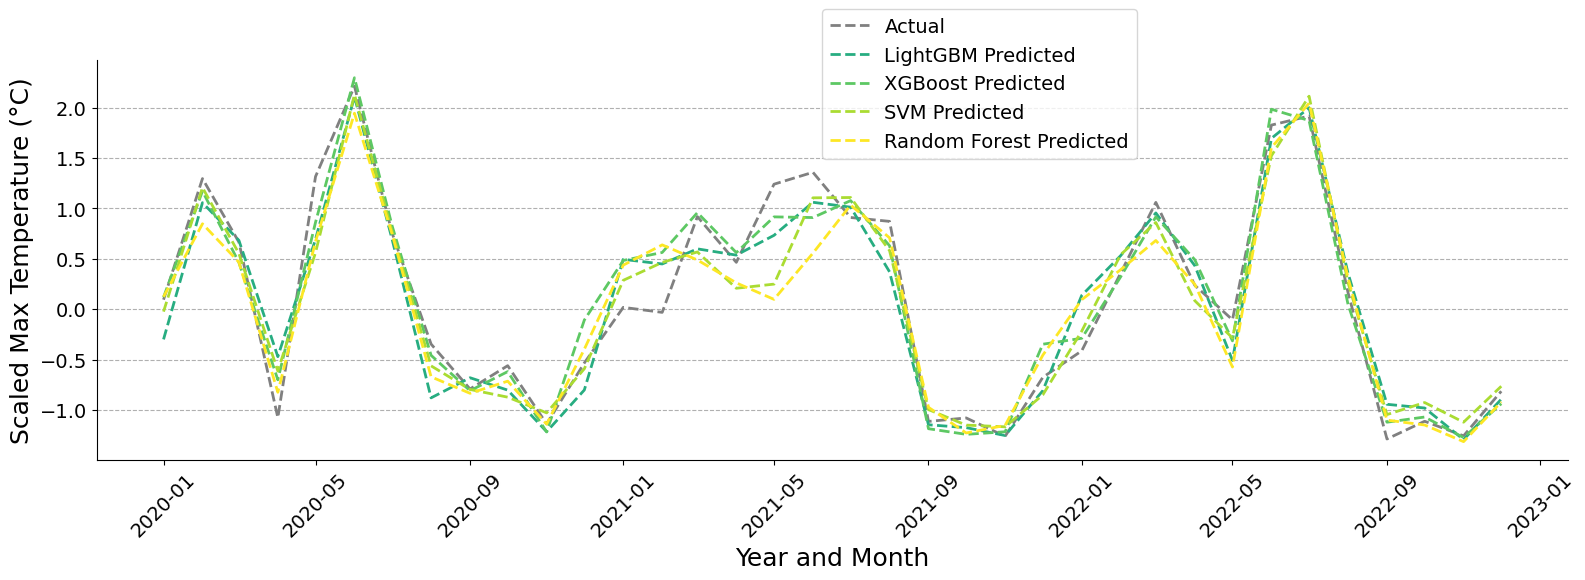

In [53]:

# Model names
models = [
    ('LightGBM', lightgbm_forecast),
    ('XGBoost', xgboost_forecast),
    ('SVM', svm_forecast),
    ('Random Forest', random_forest_forecast)
]

# Clear existing lists in case they contain previous values
model_names.clear()
mae_values.clear()
rmse_values.clear()
r2_values.clear()
nse_values.clear()
willmott_values.clear()

# Iterate over each model, perform walk-forward validation, and append metrics to lists
for model_name, model_func in models:
    mae, rmse, r2, nse, willmott, test_index, y, yhat = walk_forward_validation(data_df, model_func)
    
    model_names.append(model_name)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)
    nse_values.append(nse)
    willmott_values.append(willmott)

# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics_df = pd.DataFrame(metrics)

# Plot the actual vs predicted values for each model
plt.figure(figsize=(16, 6))
plt.plot(test_index, y, label='Actual', linestyle='--', color='gray', linewidth=2)



# Plot predictions for each model
for model_name, model_func in models:
    _, _, _, _, _, test_index, _, yhat = walk_forward_validation(data_df, model_func)
    plt.plot(test_index, yhat, label=f'{model_name} Predicted', linestyle='--', color=colors_dict[model_name], linewidth=2)

plt.xlabel('Year and Month', fontsize=18)
plt.ylabel('Scaled Max Temperature (°C)', fontsize=18)
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.6, 1.15), ncol=1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### EVALUATE THE MODEL

In [54]:
# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics = pd.DataFrame(metrics)

In [55]:
metrics

Model       MAE      RMSE  R-squared  Nash-Sutcliffe Efficiency  \
0       LightGBM  0.242552  0.305790   0.908616                   0.908616   
1        XGBoost  0.179235  0.233781   0.946588                   0.946588   
2            SVM  0.222966  0.295586   0.914613                   0.914613   
3  Random Forest  0.260911  0.381365   0.857864                   0.857864   

   Willmott's Index of Agreement  
0                       0.975395  
1                       0.986009  
2                       0.976109  
3                       0.958562

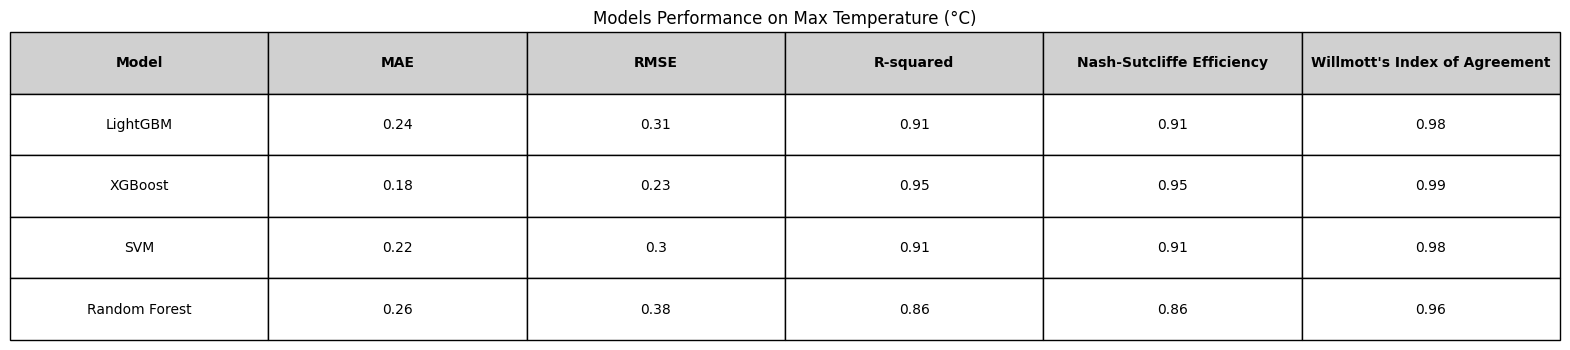

In [56]:
metrics = metrics.round(2)

fig, ax = plt.subplots(figsize=(20, 4))
ax.axis('off')

table = ax.table(cellText=metrics.values,
                 colLabels=metrics.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

header_color = '#D0D0D0'
data_color = '#FFFFFF'

for i, key in enumerate(table._cells):
    cell = table._cells[key]
    cell.set_edgecolor('black')
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(weight='bold')
        cell.set_facecolor(header_color)
    else:
        cell.set_facecolor(data_color)

plt.title('Models Performance on Max Temperature (°C)')
plt.show()


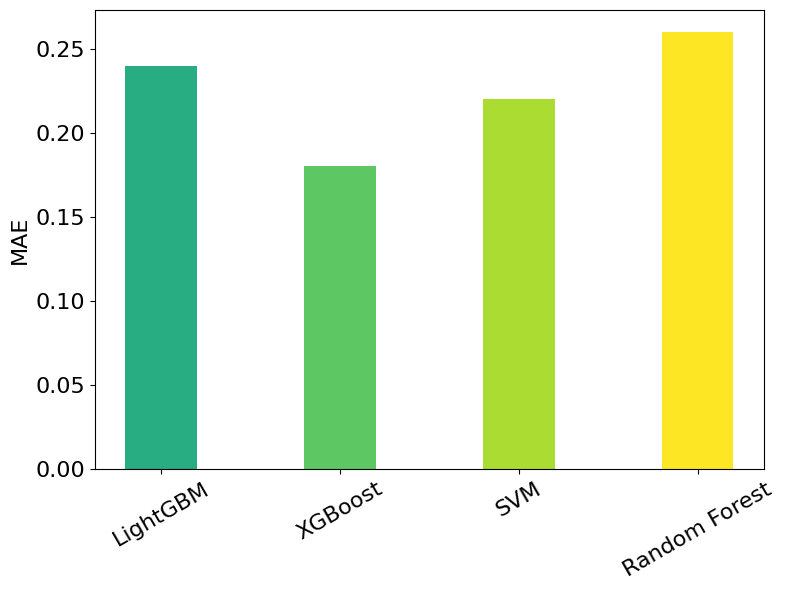

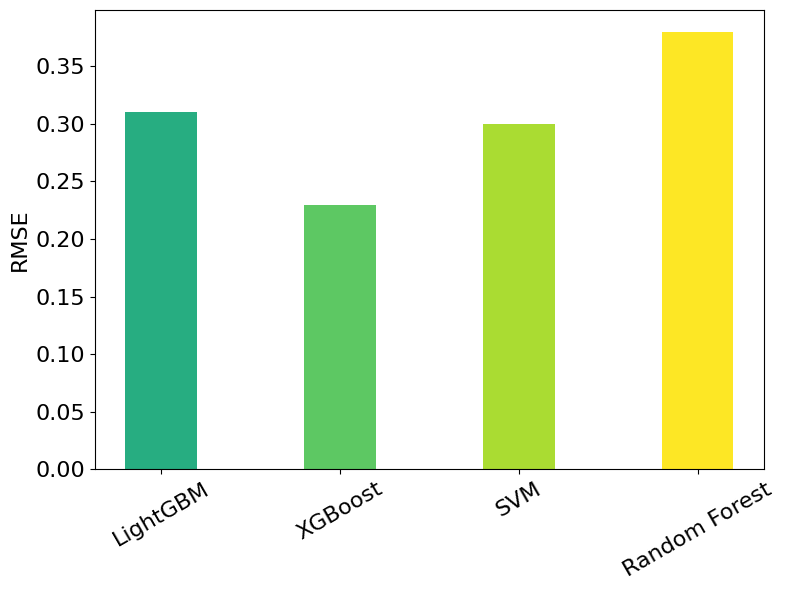

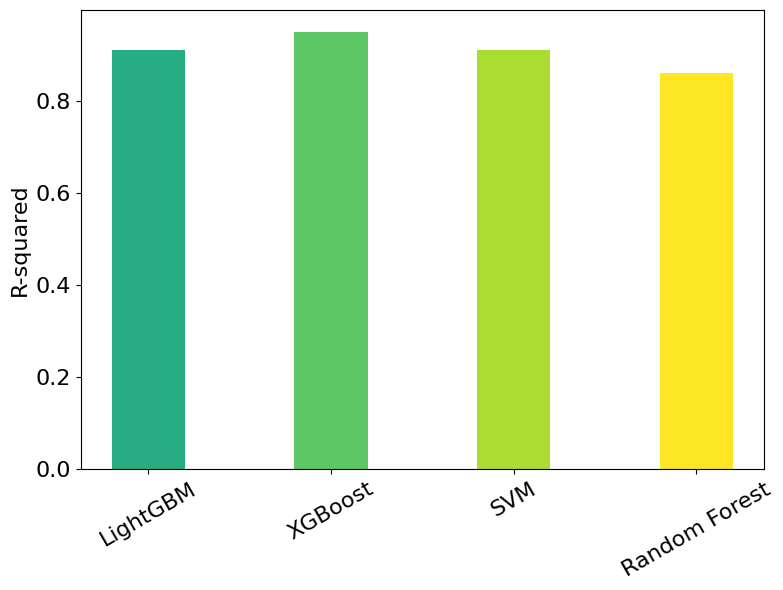

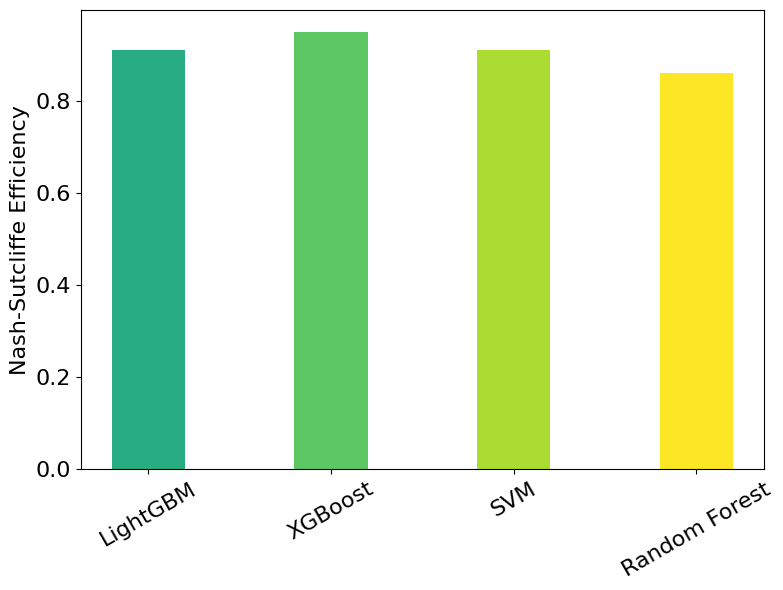

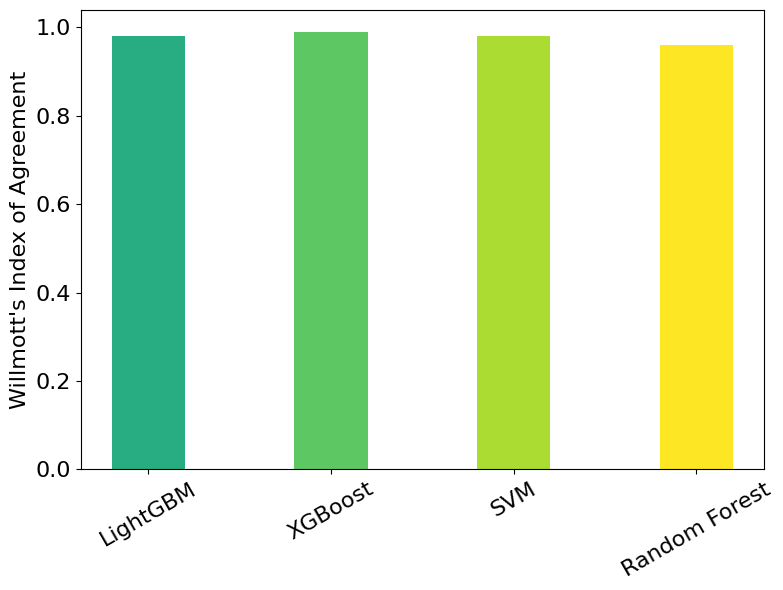

In [57]:

colors = ['#27ad81', '#5dc863', '#aadc32', '#fde725']
bar_width = 0.4

# Metrics and Titles
metrics_title = {
    'MAE': 'Mean Absolute Error (MAE)',
    'RMSE': 'Root Mean Squared Error (RMSE)',
    'R-squared': 'R-squared',
    'Nash-Sutcliffe Efficiency': 'Nash-Sutcliffe Efficiency',
    'Willmott\'s Index of Agreement': 'Willmott\'s Index of Agreement'
}

# Plot each metric separately
for metric, title in metrics_title.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(metrics['Model'], metrics[metric], color=colors, width=bar_width)
    # ax.set_title(title, fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.tick_params(axis='x', rotation=30, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.tight_layout()
    plt.show()


## 8. TEMP MIN ANALYSIS

In [58]:
# Get the temp_max values
temp_min = transformed_data[transformed_data['Parameter'] == parameters[2]]
temp_min.head()

Parameter       Date  Value
60  Min Temperature 1993-01-01   8.94
61  Min Temperature 1994-01-01   5.01
62  Min Temperature 1995-01-01   7.14
63  Min Temperature 1996-01-01   9.28
64  Min Temperature 1997-01-01   9.30

In [59]:
# drop the parameter columns
temp_min = temp_min.drop(columns=['Parameter'])

In [60]:
temp_min.head()

Date  Value
60 1993-01-01   8.94
61 1994-01-01   5.01
62 1995-01-01   7.14
63 1996-01-01   9.28
64 1997-01-01   9.30

In [61]:
# sort according to  the date
temp_min= temp_min.sort_values(by='Date')
temp_min.head()

Date  Value
60  1993-01-01   8.94
270 1993-02-01   9.83
480 1993-03-01   7.20
690 1993-04-01  13.94
900 1993-05-01  12.45

In [62]:
temp_min.head()

Date  Value
60  1993-01-01   8.94
270 1993-02-01   9.83
480 1993-03-01   7.20
690 1993-04-01  13.94
900 1993-05-01  12.45

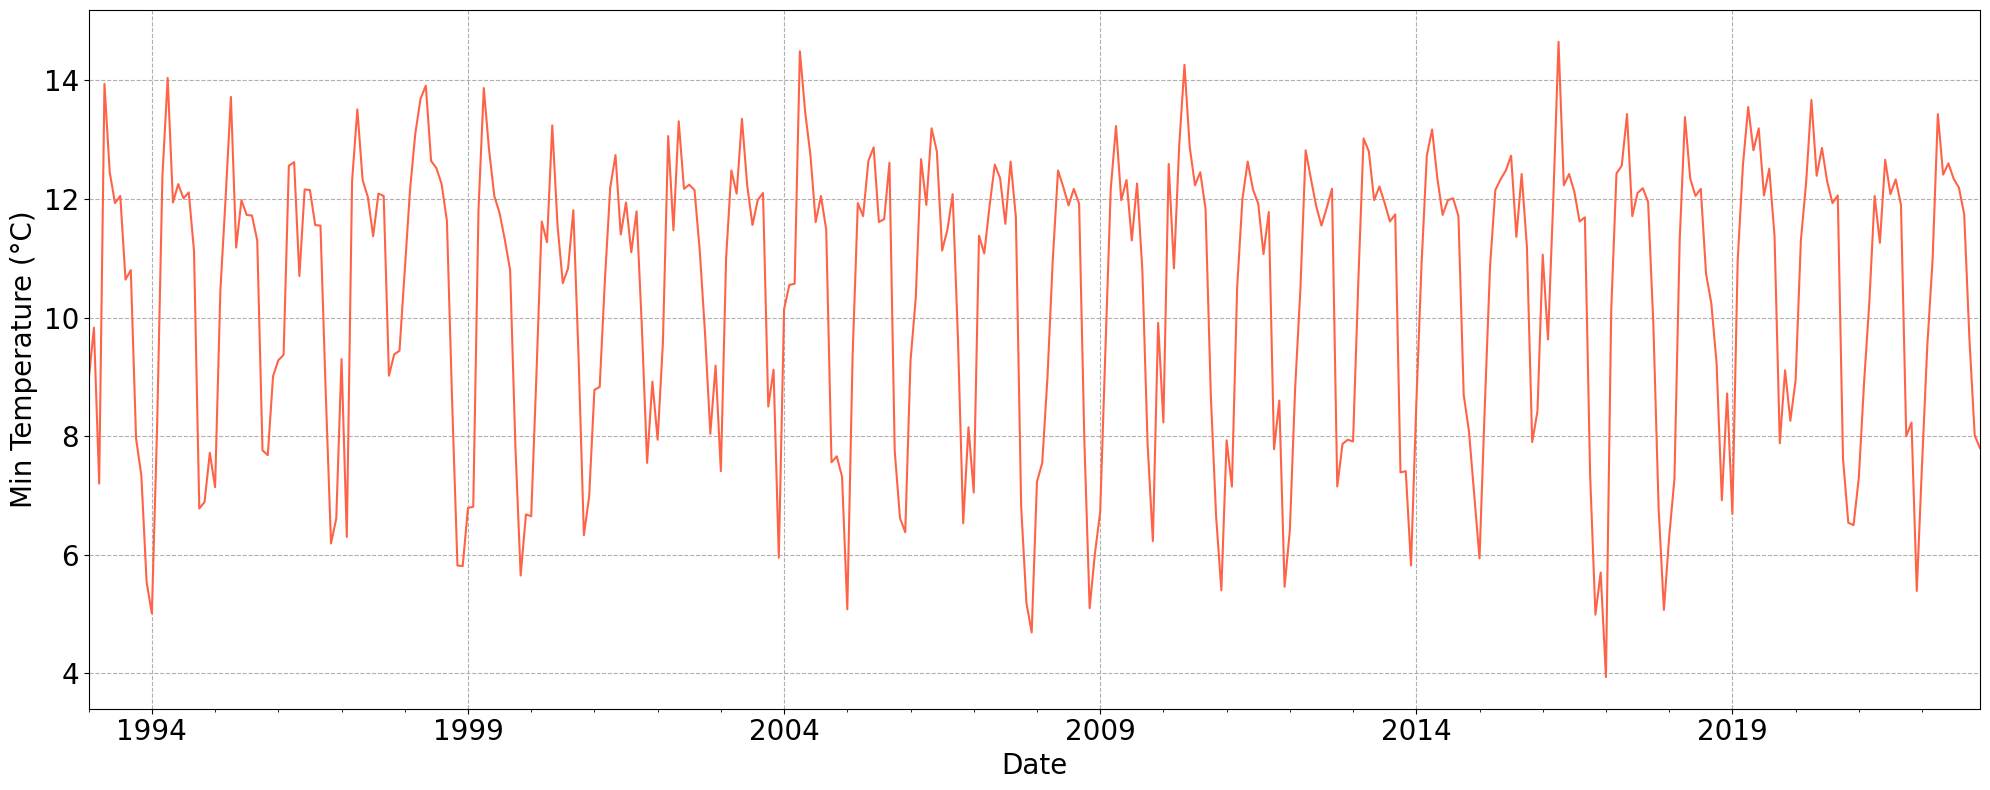

In [63]:
plt.figure(figsize=(20, 8))
temp_min.plot(x='Date', y='Value', kind='line', ax=plt.gca(), color='#ff6347', fontsize=12)
plt.xlabel('Date', fontdict={'fontsize':20})
plt.ylabel('Min Temperature (°C)', fontdict={'fontsize':20})
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(linestyle='--')
plt.tight_layout()
plt.legend().remove()
plt.show()

In [64]:
# Add fuller test to check the stationarity of the dataset
def adfuller_test(values):
    result = adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0)")
    else:
        print("Weak evidence against the null hypothesis(H0)")

In [65]:
# H0: It is non stationary
# H1: It is stationary

In [66]:
adfuller_test(temp_min['Value'])

ADF Test Statistic : -5.192846167380288
p-value : 9.092619416868067e-06
#Lags Used : 14
Number of Observations Used : 345
Strong evidence against the null hypothesis(H0)


In [67]:
temp_min = temp_min[['Date', 'Value']]
temp_min.set_index('Date', inplace=True)
temp_min.head()

Value
Date             
1993-01-01   8.94
1993-02-01   9.83
1993-03-01   7.20
1993-04-01  13.94
1993-05-01  12.45

### TRAIN THE MODEL

In [68]:
# Assuming `temp_min` is your time series DataFrame
series = temp_min
values = series.values
values = add_rolling_features(values, window=3)
values = pd.DataFrame(values).values
scaler = StandardScaler()
values = scaler.fit_transform(values)
data = series_to_supervised(values, n_in=6)
data_df = pd.DataFrame(data, index=series.index[6+2:])

>expected=-1.0, predicted=-0.3
>expected=0.3, predicted=0.6
>expected=0.5, predicted=1.0
>expected=-0.1, predicted=-0.1
>expected=-0.6, predicted=-0.6
>expected=-0.7, predicted=-0.7
>expected=-1.1, predicted=-0.9
>expected=-0.9, predicted=-0.9
>expected=-1.3, predicted=-1.0
>expected=1.4, predicted=1.2
>expected=1.9, predicted=1.8
>expected=-0.8, predicted=-0.2
>expected=-1.0, predicted=-0.4
>expected=-0.1, predicted=0.9
>expected=0.2, predicted=0.8
>expected=0.3, predicted=0.4
>expected=-0.5, predicted=-0.1
>expected=-0.7, predicted=-0.9
>expected=-0.7, predicted=-0.9
>expected=-1.1, predicted=-1.0
>expected=-1.2, predicted=-1.2
>expected=1.3, predicted=1.0
>expected=1.0, predicted=1.1
>expected=0.3, predicted=0.2
>expected=0.2, predicted=-0.1
>expected=0.9, predicted=0.3
>expected=0.5, predicted=0.4
>expected=0.8, predicted=0.4
>expected=-0.1, predicted=-0.4
>expected=-0.9, predicted=-0.6
>expected=-1.3, predicted=-1.1
>expected=-1.2, predicted=-1.1
>expected=-1.1, predicted=-1.2
>ex

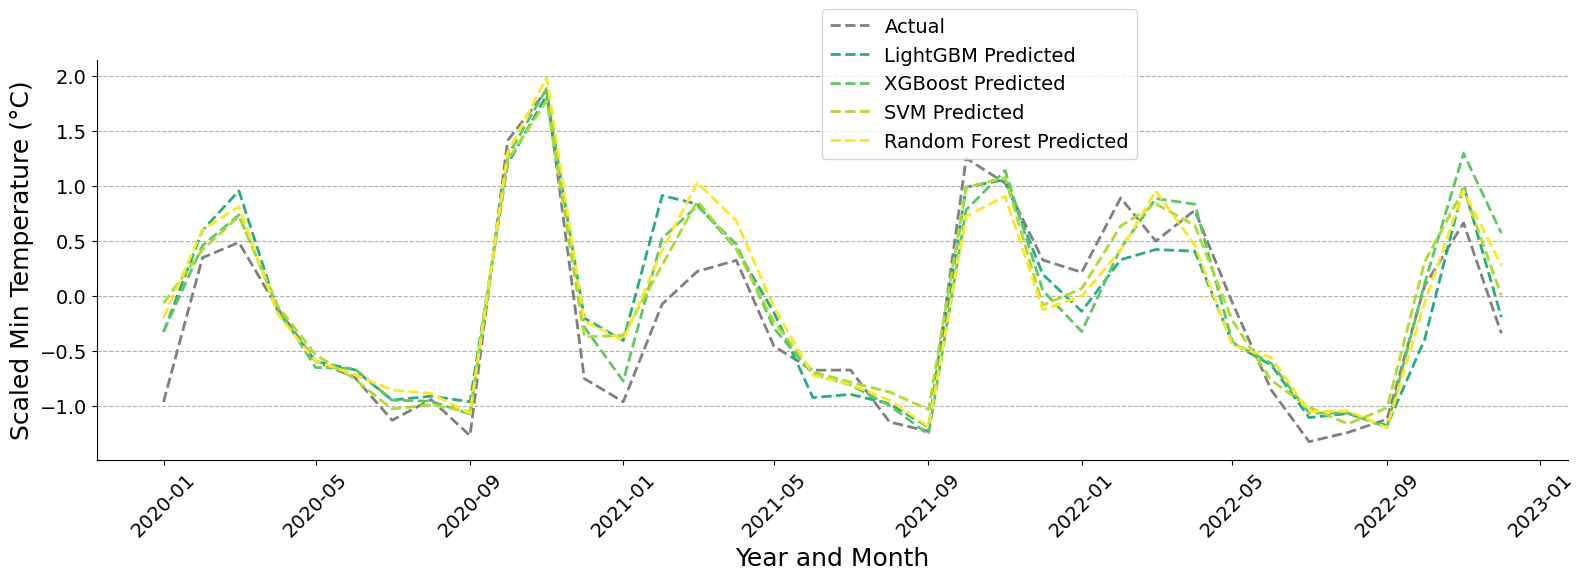

In [69]:
# Model Names
models = [
    ('LightGBM', lightgbm_forecast),
    ('XGBoost', xgboost_forecast),
    ('SVM', svm_forecast),
    ('Random Forest', random_forest_forecast)
]

# Clear existing lists in case they contain previous values
model_names.clear()
mae_values.clear()
rmse_values.clear()
r2_values.clear()
nse_values.clear()
willmott_values.clear()

# Iterate over each model, perform walk-forward validation, and append metrics to lists
for model_name, model_func in models:
    mae, rmse, r2, nse, willmott, test_index, y, yhat = walk_forward_validation(data_df, model_func)
    model_names.append(model_name)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)
    nse_values.append(nse)
    willmott_values.append(willmott)

# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics_df = pd.DataFrame(metrics)

# Plot the actual vs predicted values for each model
plt.figure(figsize=(16, 6))
plt.plot(test_index, y, label='Actual', linestyle='--', color='gray', linewidth=2)


# Plot predictions for each model
for model_name, model_func in models:
    _, _, _, _, _, test_index, _, yhat = walk_forward_validation(data_df, model_func)
    plt.plot(test_index, yhat, label=f'{model_name} Predicted', linestyle='--', color=colors_dict[model_name], linewidth=2)

plt.xlabel('Year and Month', fontsize=18)
plt.ylabel('Scaled Min Temperature (°C)', fontsize=18)
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.6, 1.15), ncol=1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### EVALUATE THE MODEL

In [70]:
# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}
metrics = pd.DataFrame(metrics)

In [71]:
metrics

Model       MAE      RMSE  R-squared  Nash-Sutcliffe Efficiency  \
0       LightGBM  0.272830  0.349118   0.832906                   0.832906   
1        XGBoost  0.254978  0.338639   0.842786                   0.842786   
2            SVM  0.224156  0.292298   0.882870                   0.882870   
3  Random Forest  0.289678  0.347815   0.834150                   0.834150   

   Willmott's Index of Agreement  
0                       0.954253  
1                       0.959061  
2                       0.967822  
3                       0.954190

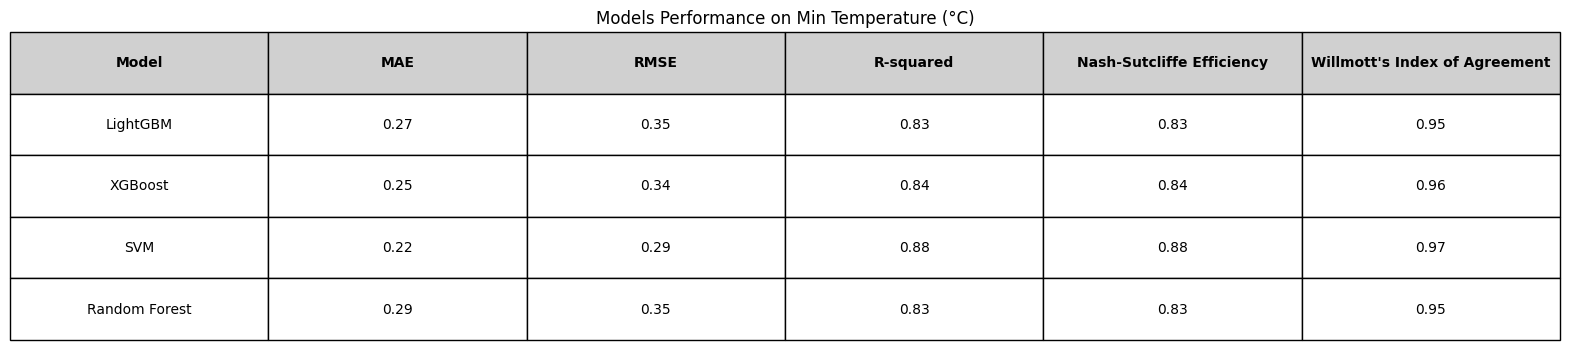

In [72]:
metrics = metrics.round(2)

fig, ax = plt.subplots(figsize=(20, 4))
ax.axis('off')

table = ax.table(cellText=metrics.values,
                 colLabels=metrics.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

header_color = '#D0D0D0'
data_color = '#FFFFFF'

for i, key in enumerate(table._cells):
    cell = table._cells[key]
    cell.set_edgecolor('black')
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(weight='bold')
        cell.set_facecolor(header_color)
    else:
        cell.set_facecolor(data_color)

plt.title('Models Performance on Min Temperature (°C)')
plt.show()


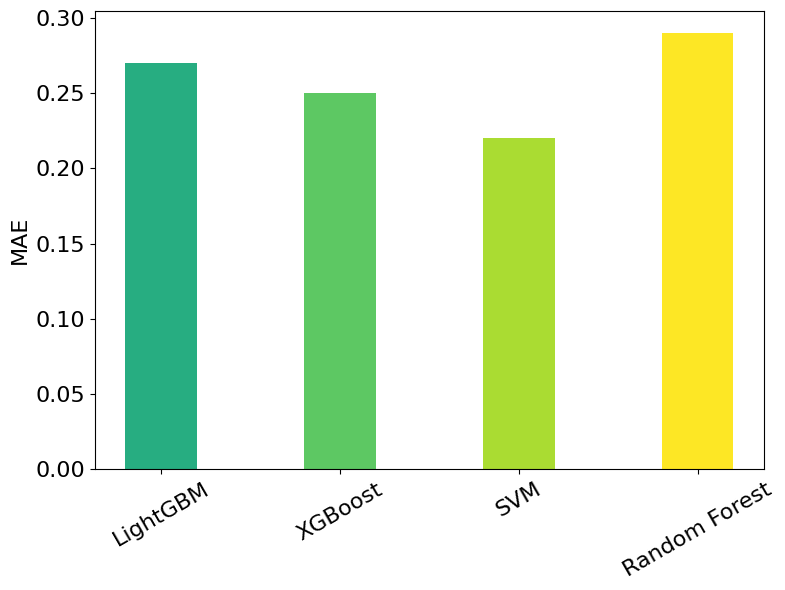

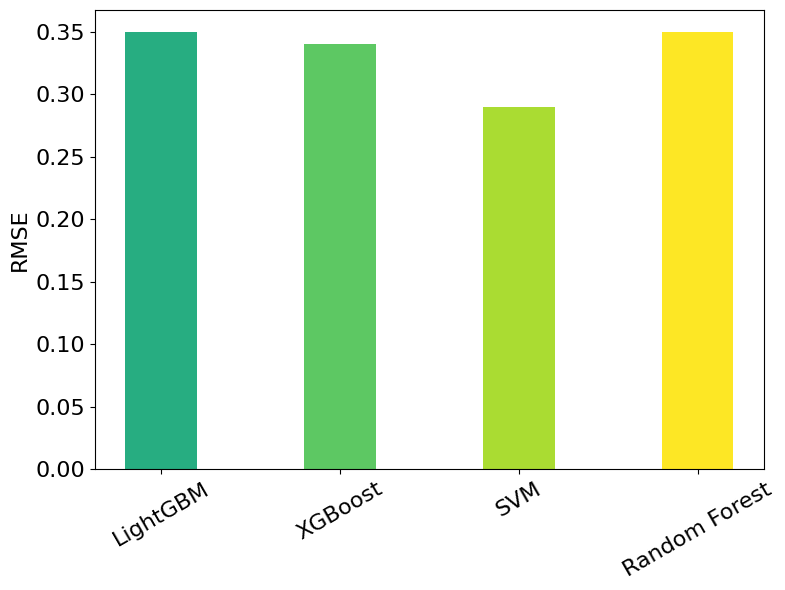

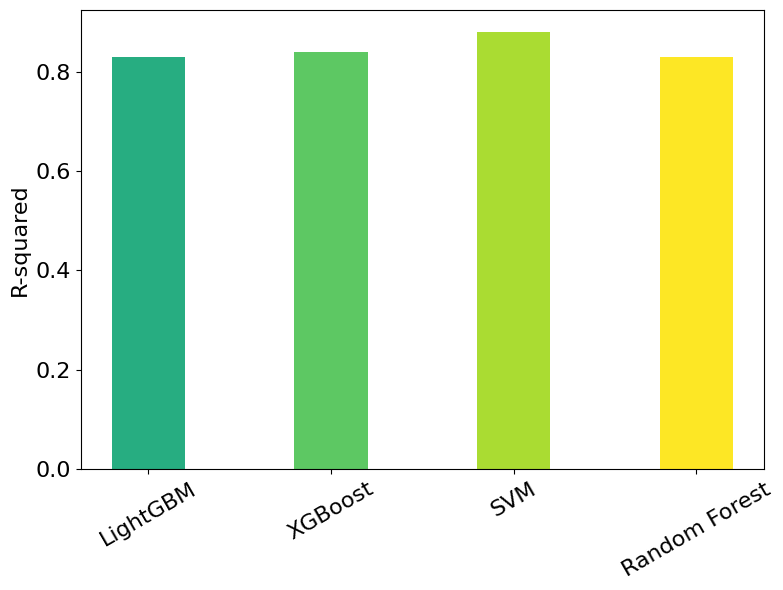

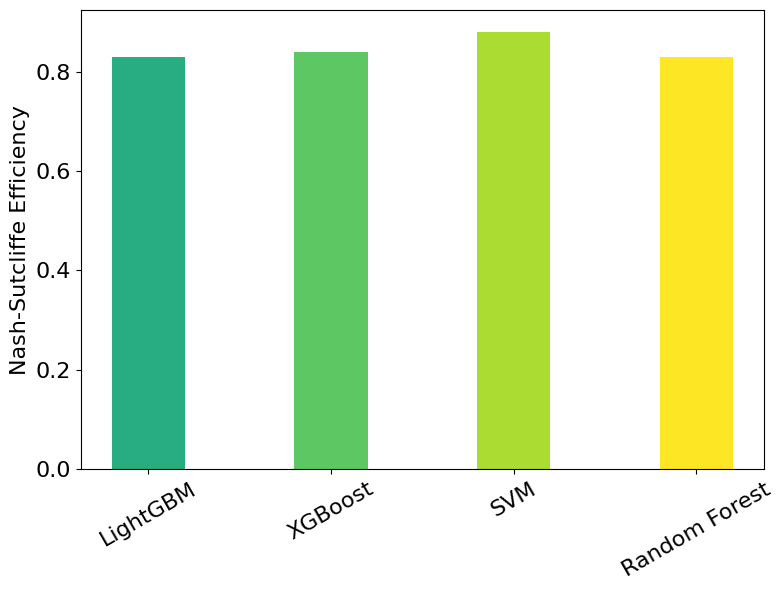

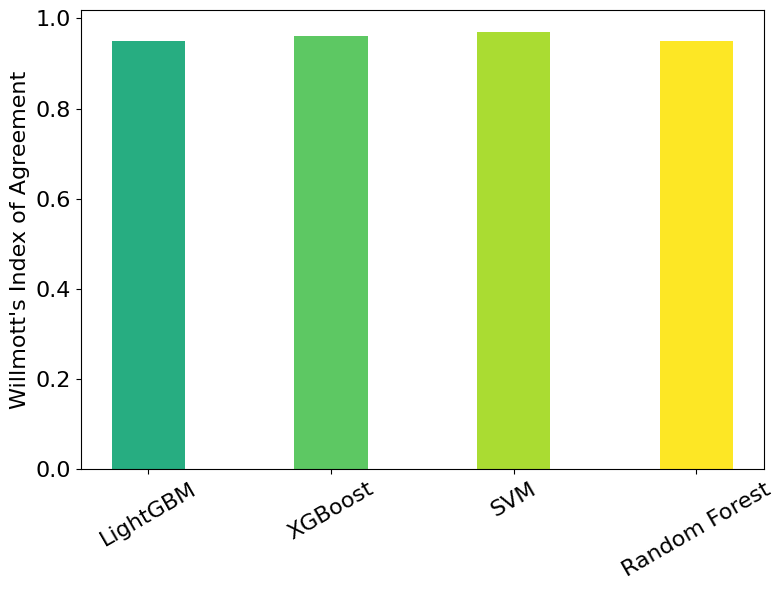

In [73]:

colors = ['#27ad81', '#5dc863', '#aadc32', '#fde725']
bar_width = 0.4

# Metrics and Titles
metrics_title = {
    'MAE': 'Mean Absolute Error (MAE)',
    'RMSE': 'Root Mean Squared Error (RMSE)',
    'R-squared': 'R-squared',
    'Nash-Sutcliffe Efficiency': 'Nash-Sutcliffe Efficiency',
    'Willmott\'s Index of Agreement': 'Willmott\'s Index of Agreement'
}

# Plot each metric separately
for metric, title in metrics_title.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(metrics['Model'], metrics[metric], color=colors, width=bar_width)
    # ax.set_title(title, fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.tick_params(axis='x', rotation=30, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.tight_layout()
    plt.show()


## 9. WIND SPEED MAX ANALYSIS

In [74]:
# Get the wind_max values
wind_max = transformed_data[transformed_data['Parameter'] == parameters[3]]
wind_max.head()

Parameter       Date  Value
90  Max Windspeed 1993-01-01   6.30
91  Max Windspeed 1994-01-01   5.90
92  Max Windspeed 1995-01-01   4.12
93  Max Windspeed 1996-01-01   5.26
94  Max Windspeed 1997-01-01   4.66

In [75]:
# drop the parameter columns
wind_max = wind_max.drop(columns=['Parameter'])

In [76]:
wind_max.head()

Date  Value
90 1993-01-01   6.30
91 1994-01-01   5.90
92 1995-01-01   4.12
93 1996-01-01   5.26
94 1997-01-01   4.66

In [77]:
# sort according to  the date
wind_max= wind_max.sort_values(by='Date')
wind_max.head()

Date  Value
90  1993-01-01   6.30
300 1993-02-01   5.79
510 1993-03-01   6.16
720 1993-04-01   4.23
930 1993-05-01   4.96

In [78]:
wind_max.head()

Date  Value
90  1993-01-01   6.30
300 1993-02-01   5.79
510 1993-03-01   6.16
720 1993-04-01   4.23
930 1993-05-01   4.96

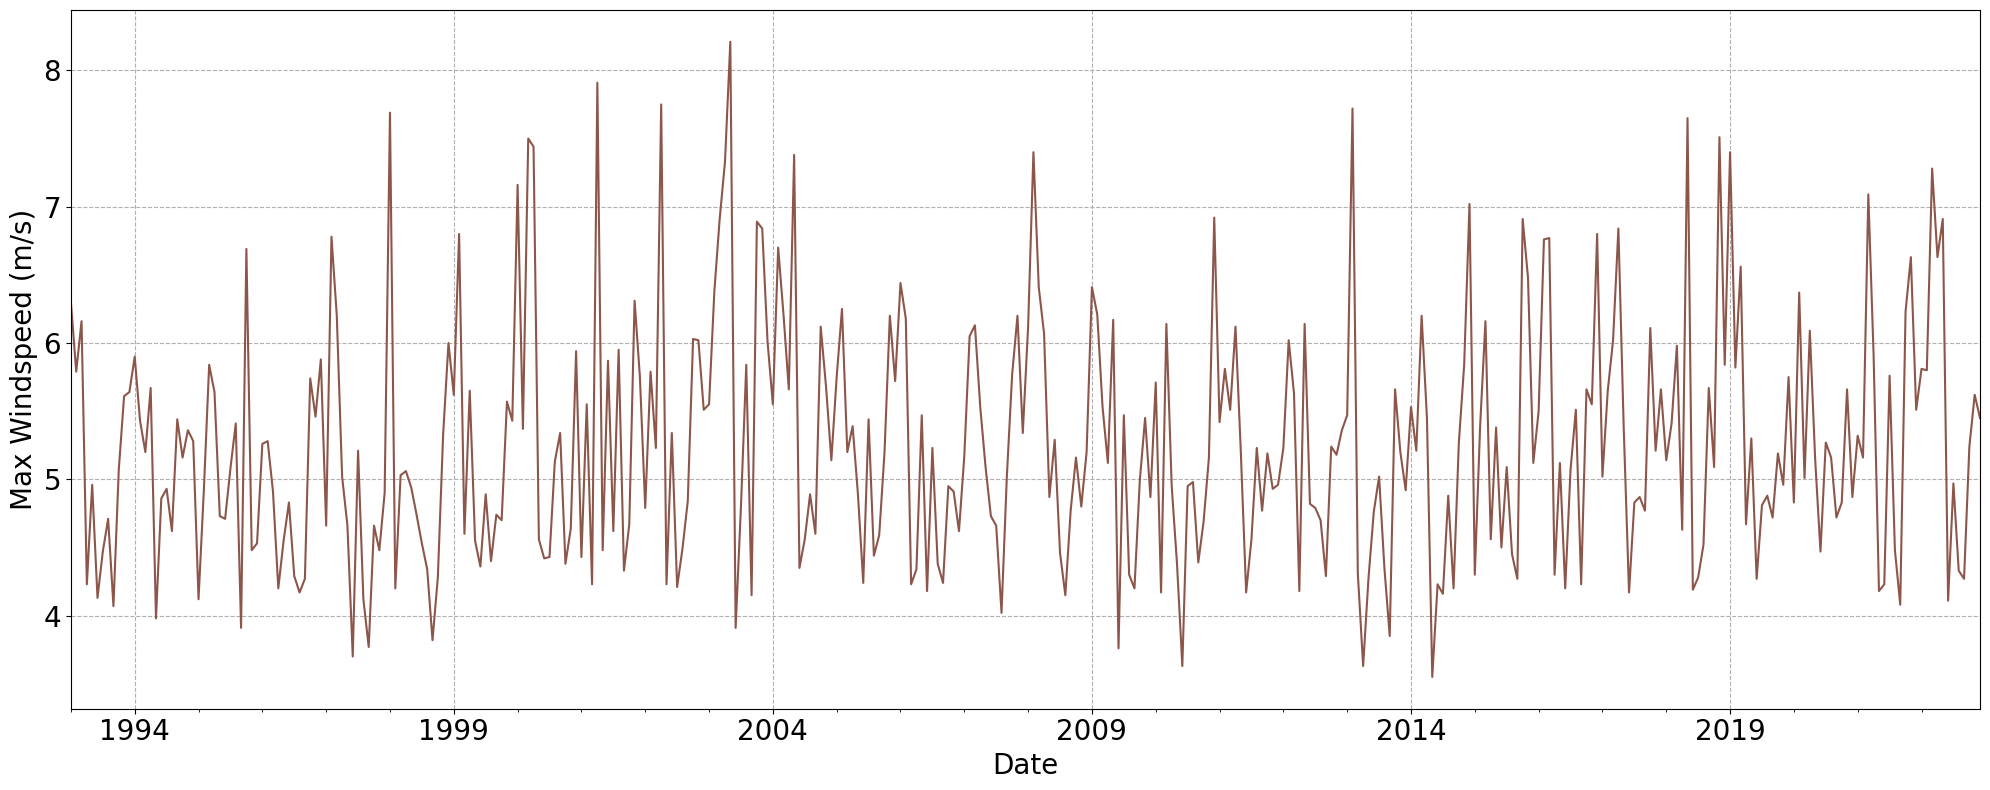

In [79]:
plt.figure(figsize=(20, 8))
wind_max.plot(x='Date', y='Value', kind='line', ax=plt.gca(), color='#8c564b', fontsize=12)
plt.xlabel('Date', fontdict={'fontsize':20})
plt.ylabel('Max Windspeed (m/s)', fontdict={'fontsize':20})
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(linestyle='--')
plt.tight_layout()
plt.legend().remove()
plt.show()

In [80]:
# Add fuller test to check the stationarity of the dataset
def adfuller_test(values):
    result = adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0)")
    else:
        print("Weak evidence against the null hypothesis(H0)")

In [81]:
# H0: It is non stationary
# H1: It is stationary

In [82]:
adfuller_test(wind_max['Value'])

ADF Test Statistic : -2.9372477217959543
p-value : 0.04118489121464874
#Lags Used : 12
Number of Observations Used : 347
Strong evidence against the null hypothesis(H0)


In [83]:
wind_max = wind_max[['Date', 'Value']]
wind_max.set_index('Date', inplace=True)
wind_max.head()

Value
Date             
1993-01-01   6.30
1993-02-01   5.79
1993-03-01   6.16
1993-04-01   4.23
1993-05-01   4.96

### TRAIN THE MODEL

In [84]:
# Assuming `wind_max` is your time series DataFrame
series = wind_max
values = series.values
values = add_rolling_features(values, window=3)
values = pd.DataFrame(values).values
scaler = StandardScaler()
values = scaler.fit_transform(values)
data = series_to_supervised(values, n_in=6)
data_df = pd.DataFrame(data, index=series.index[6+2:])

>expected=-0.4, predicted=-0.8
>expected=0.2, predicted=-0.0
>expected=0.4, predicted=0.1
>expected=0.1, predicted=0.0
>expected=-0.2, predicted=-0.3
>expected=0.3, predicted=0.0
>expected=-0.6, predicted=-0.1
>expected=-0.6, predicted=-0.5
>expected=-0.9, predicted=-1.1
>expected=-1.1, predicted=-1.2
>expected=-0.4, predicted=-0.2
>expected=-0.5, predicted=-0.5
>expected=-0.7, predicted=-0.8
>expected=-1.1, predicted=-0.9
>expected=0.9, predicted=1.1
>expected=0.7, predicted=0.7
>expected=1.8, predicted=1.8
>expected=0.7, predicted=0.1
>expected=0.5, predicted=0.3
>expected=0.3, predicted=0.1
>expected=0.4, predicted=0.2
>expected=1.1, predicted=0.7
>expected=1.6, predicted=1.4
>expected=-0.3, predicted=0.7
>expected=-0.3, predicted=-0.3
>expected=-1.2, predicted=-0.7
>expected=0.4, predicted=0.3
>expected=0.1, predicted=0.4
>expected=-0.9, predicted=0.6
>expected=2.0, predicted=1.4
>expected=1.8, predicted=2.4
>expected=-0.6, predicted=-0.2
>expected=-0.7, predicted=-0.6
>expected=-0

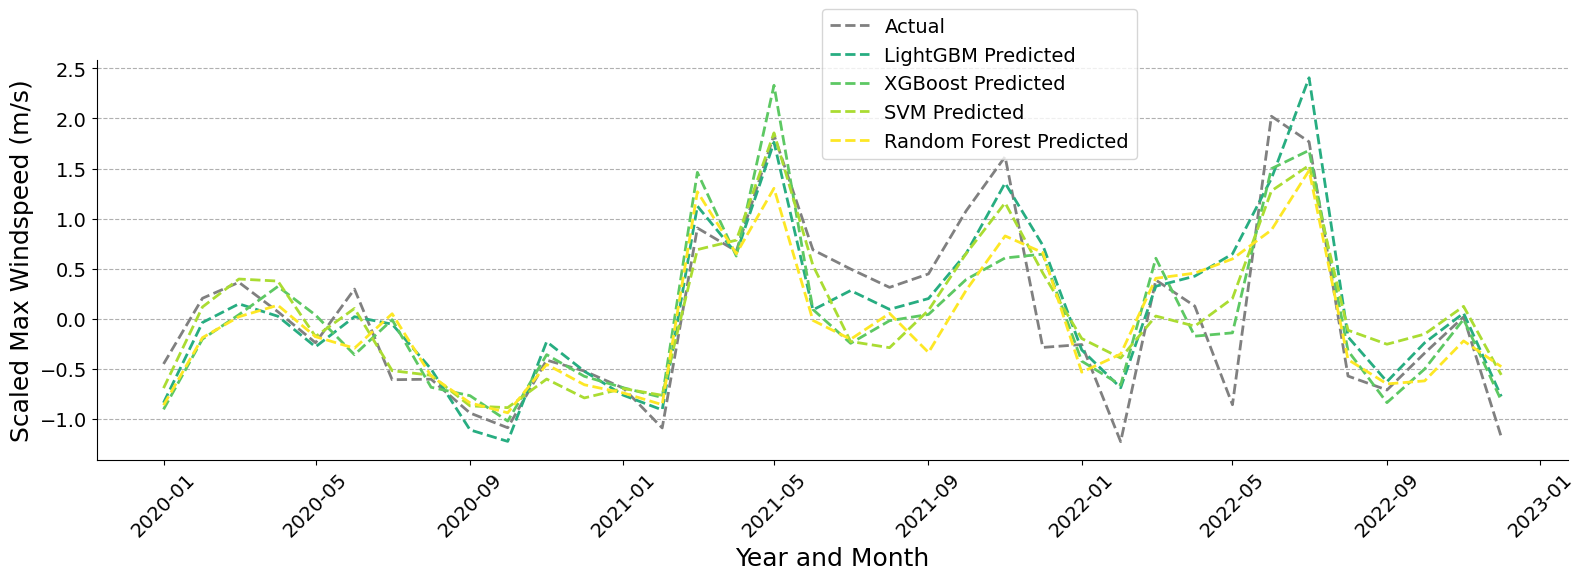

In [85]:

# Model names
models = [
    ('LightGBM', lightgbm_forecast),
    ('XGBoost', xgboost_forecast),
    ('SVM', svm_forecast),
    ('Random Forest', random_forest_forecast)
]

# Clear existing lists in case they contain previous values
model_names.clear()
mae_values.clear()
rmse_values.clear()
r2_values.clear()
nse_values.clear()
willmott_values.clear()

# Iterate over each model, perform walk-forward validation, and append metrics to lists
for model_name, model_func in models:
    mae, rmse, r2, nse, willmott, test_index, y, yhat = walk_forward_validation(data_df, model_func)
    
    model_names.append(model_name)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)
    nse_values.append(nse)
    willmott_values.append(willmott)

# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics_df = pd.DataFrame(metrics)

# Plot the actual vs predicted values for each model
plt.figure(figsize=(16, 6))
plt.plot(test_index, y, label='Actual', linestyle='--', color='gray', linewidth=2)


# Plot predictions for each model
for model_name, model_func in models:
    _, _, _, _, _, test_index, _, yhat = walk_forward_validation(data_df, model_func)
    plt.plot(test_index, yhat, label=f'{model_name} Predicted', linestyle='--', color=colors_dict[model_name], linewidth=2)

plt.xlabel('Year and Month', fontsize=18)
plt.ylabel('Scaled Max Windspeed (m/s)', fontsize=18)
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.6, 1.15), ncol=1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### EVALUATE THE MODEL

In [86]:
# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics = pd.DataFrame(metrics)

In [87]:
metrics

Model       MAE      RMSE  R-squared  Nash-Sutcliffe Efficiency  \
0       LightGBM  0.295678  0.421834   0.762033                   0.762033   
1        XGBoost  0.361075  0.445643   0.734413                   0.734413   
2            SVM  0.312551  0.407118   0.778348                   0.778348   
3  Random Forest  0.385489  0.523627   0.633329                   0.633329   

   Willmott's Index of Agreement  
0                       0.933910  
1                       0.922154  
2                       0.928072  
3                       0.867706

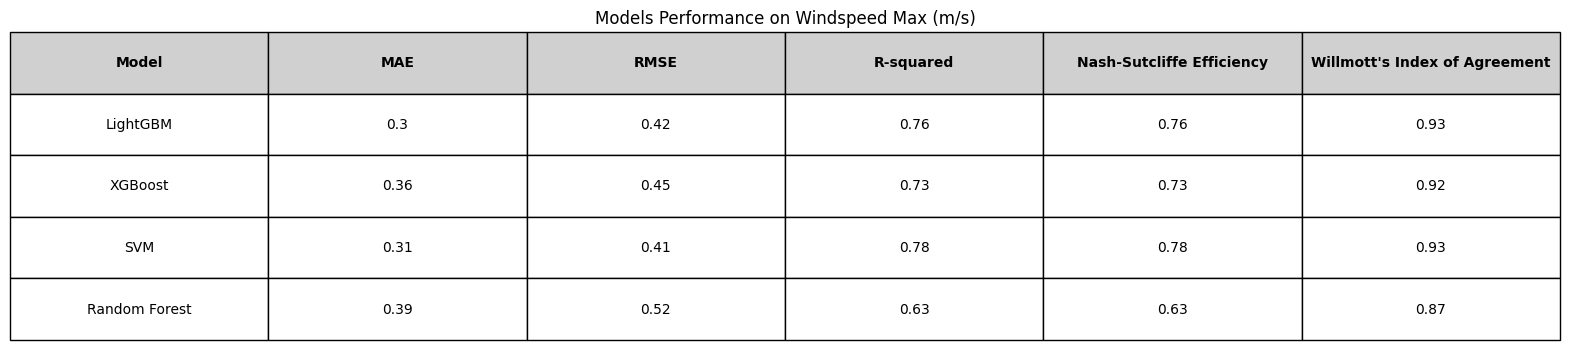

In [88]:
metrics = metrics.round(2)

fig, ax = plt.subplots(figsize=(20, 4))
ax.axis('off')

table = ax.table(cellText=metrics.values,
                 colLabels=metrics.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

header_color = '#D0D0D0'
data_color = '#FFFFFF'

for i, key in enumerate(table._cells):
    cell = table._cells[key]
    cell.set_edgecolor('black')
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(weight='bold')
        cell.set_facecolor(header_color)
    else:
        cell.set_facecolor(data_color)

plt.title('Models Performance on Windspeed Max (m/s)')
plt.show()


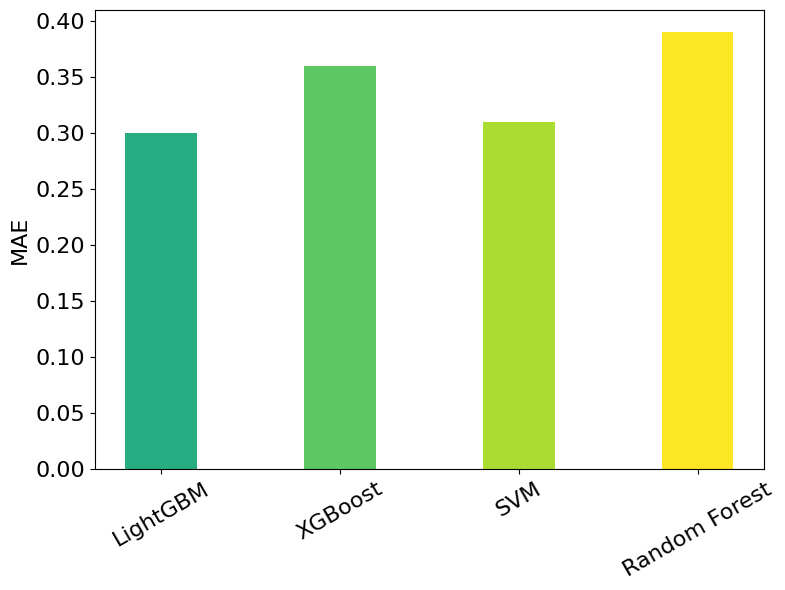

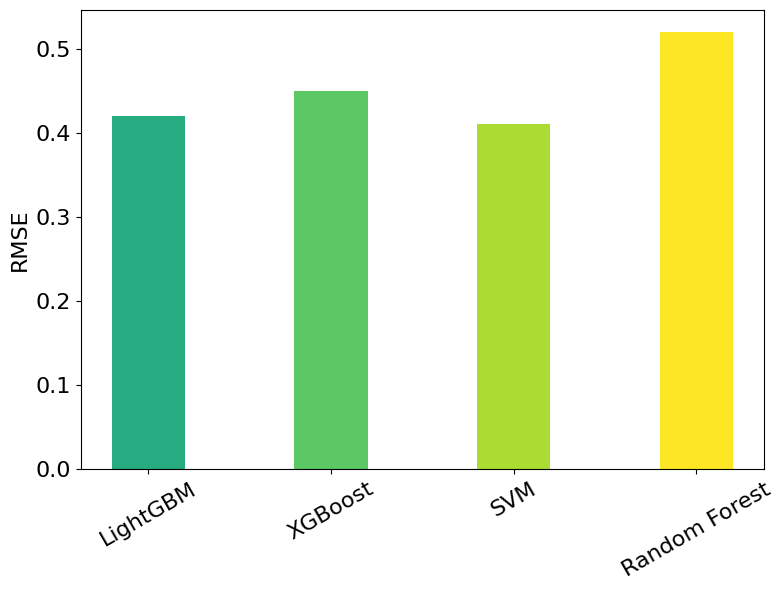

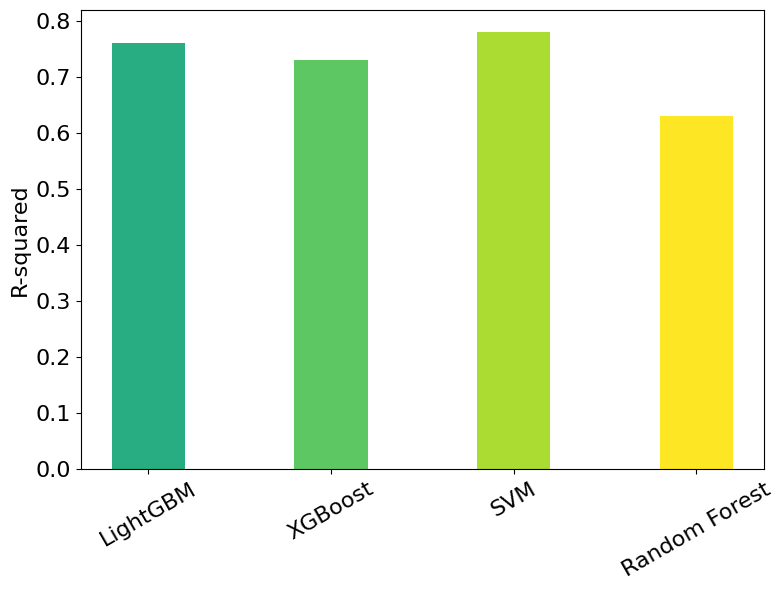

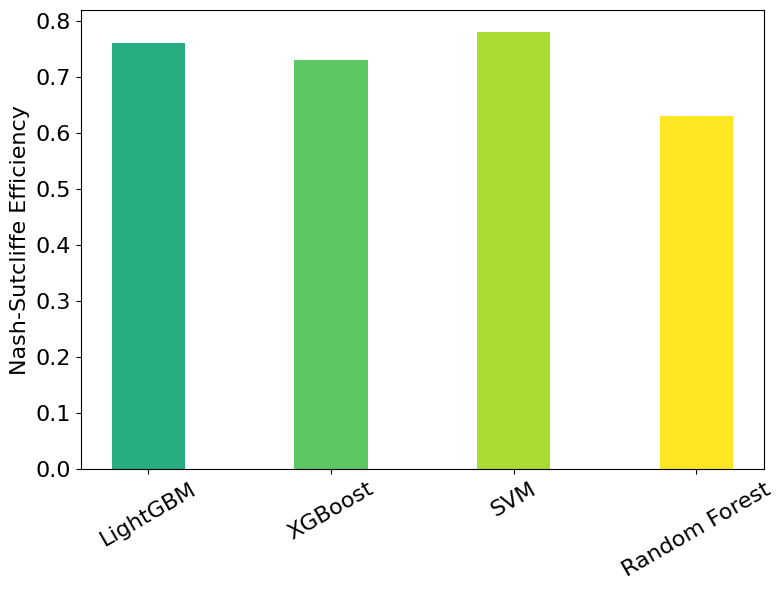

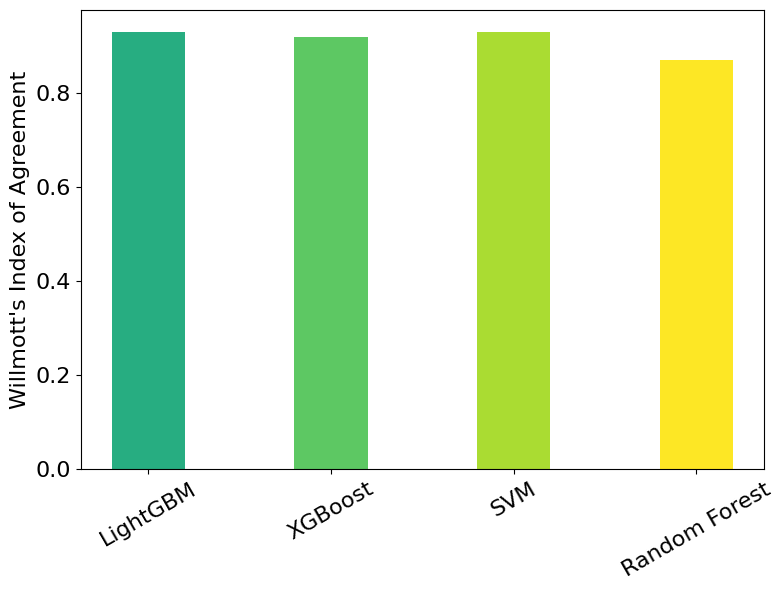

In [89]:

colors = ['#27ad81', '#5dc863', '#aadc32', '#fde725']
bar_width = 0.4

# Metrics and Titles
metrics_title = {
    'MAE': 'Mean Absolute Error (MAE)',
    'RMSE': 'Root Mean Squared Error (RMSE)',
    'R-squared': 'R-squared',
    'Nash-Sutcliffe Efficiency': 'Nash-Sutcliffe Efficiency',
    'Willmott\'s Index of Agreement': 'Willmott\'s Index of Agreement'
}

# Plot each metric separately
for metric, title in metrics_title.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(metrics['Model'], metrics[metric], color=colors, width=bar_width)
    # ax.set_title(title, fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.tick_params(axis='x', rotation=30, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.tight_layout()
    plt.show()


## 10. WIND SPEED MIN ANALYSIS

In [90]:
# Get the wind_max values
wind_min = transformed_data[transformed_data['Parameter'] == parameters[4]]
wind_min.head()

Parameter       Date  Value
120  Min Windspeed 1993-01-01   0.07
121  Min Windspeed 1994-01-01   0.13
122  Min Windspeed 1995-01-01   0.04
123  Min Windspeed 1996-01-01   0.07
124  Min Windspeed 1997-01-01   0.04

In [91]:
# drop the parameter columns
wind_min = wind_min.drop(columns=['Parameter'])

In [92]:
wind_min.head()

Date  Value
120 1993-01-01   0.07
121 1994-01-01   0.13
122 1995-01-01   0.04
123 1996-01-01   0.07
124 1997-01-01   0.04

In [93]:
# sort according to  the date
wind_min= wind_min.sort_values(by='Date')
wind_min.head()

Date  Value
120 1993-01-01   0.07
330 1993-02-01   0.02
540 1993-03-01   0.05
750 1993-04-01   0.06
960 1993-05-01   0.03

In [94]:
wind_min.head()

Date  Value
120 1993-01-01   0.07
330 1993-02-01   0.02
540 1993-03-01   0.05
750 1993-04-01   0.06
960 1993-05-01   0.03

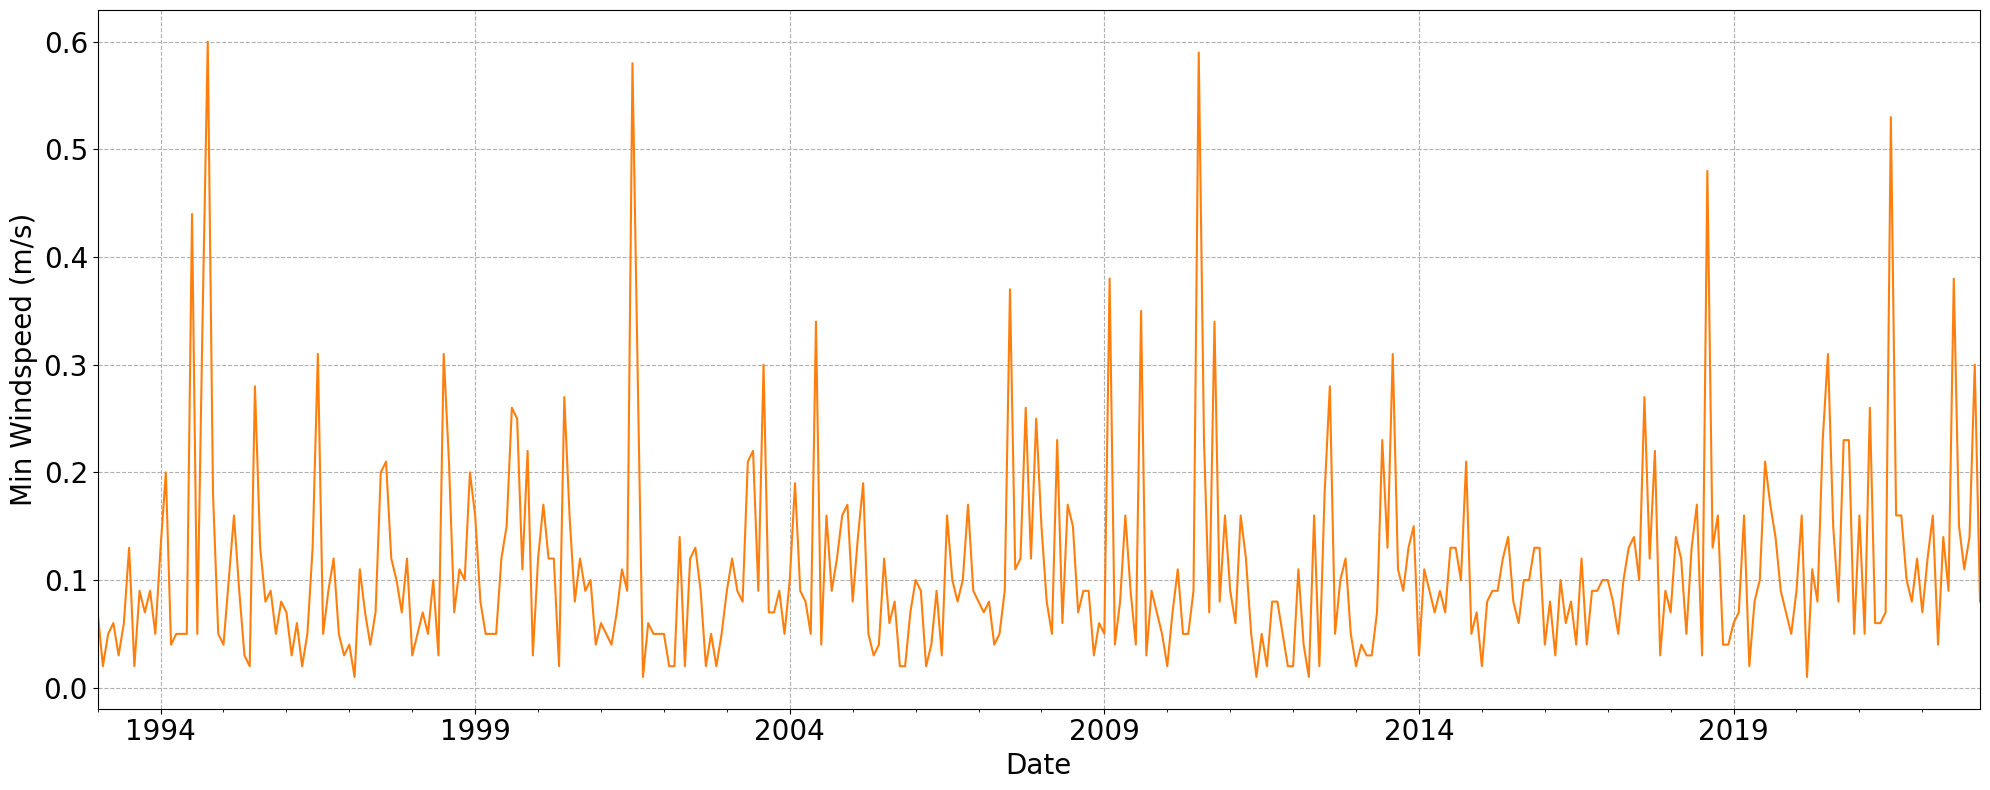

In [95]:
plt.figure(figsize=(20, 8))
wind_min.plot(x='Date', y='Value', kind='line', ax=plt.gca(), color='#ff7f0e', fontsize=12)
plt.xlabel('Date', fontdict={'fontsize':20})
plt.ylabel('Min Windspeed (m/s)', fontdict={'fontsize':20})
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(linestyle='--')
plt.tight_layout()
plt.legend().remove()
plt.show()

In [96]:
# Add fuller test to check the stationarity of the dataset
def adfuller_test(values):
    result = adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0)")
    else:
        print("Weak evidence against the null hypothesis(H0)")

In [97]:
# H0: It is non stationary
# H1: It is stationary

In [98]:
adfuller_test(wind_min['Value'])

ADF Test Statistic : -4.914605716112201
p-value : 3.266187617153589e-05
#Lags Used : 14
Number of Observations Used : 345
Strong evidence against the null hypothesis(H0)


In [99]:
wind_min = wind_min[['Date', 'Value']]
wind_min.set_index('Date', inplace=True)
wind_min.head()

Value
Date             
1993-01-01   0.07
1993-02-01   0.02
1993-03-01   0.05
1993-04-01   0.06
1993-05-01   0.03

### TRAIN THE MODEL

In [100]:
# Assuming `wind_min` is your time series DataFrame
series = wind_min
values = series.values
values = add_rolling_features(values, window=3)
values = pd.DataFrame(values).values
scaler = StandardScaler()
values = scaler.fit_transform(values)
data = series_to_supervised(values, n_in=6)
data_df = pd.DataFrame(data, index=series.index[6+2:])

>expected=-0.8, predicted=-0.7
>expected=-0.2, predicted=-0.0
>expected=0.2, predicted=-0.0
>expected=0.2, predicted=-0.0
>expected=-0.2, predicted=-0.4
>expected=0.2, predicted=0.7
>expected=0.9, predicted=1.8
>expected=0.3, predicted=1.0
>expected=0.9, predicted=0.4
>expected=0.2, predicted=0.7
>expected=0.4, predicted=0.4
>expected=0.7, predicted=0.2
>expected=0.4, predicted=0.5
>expected=-0.0, predicted=-0.2
>expected=0.7, predicted=1.0
>expected=0.9, predicted=0.5
>expected=0.9, predicted=0.4
>expected=-1.0, predicted=-0.6
>expected=3.5, predicted=2.1
>expected=3.1, predicted=2.8
>expected=2.6, predicted=2.6
>expected=-0.5, predicted=1.3
>expected=-0.4, predicted=-0.5
>expected=-0.8, predicted=-0.7
>expected=-0.7, predicted=-0.6
>expected=-0.6, predicted=-0.4
>expected=-0.3, predicted=-0.3
>expected=-0.1, predicted=-0.2
>expected=-0.0, predicted=0.1
>expected=-0.3, predicted=-0.4
>expected=1.5, predicted=1.2
>expected=1.5, predicted=2.0
>expected=1.4, predicted=1.5
>expected=-0.8,

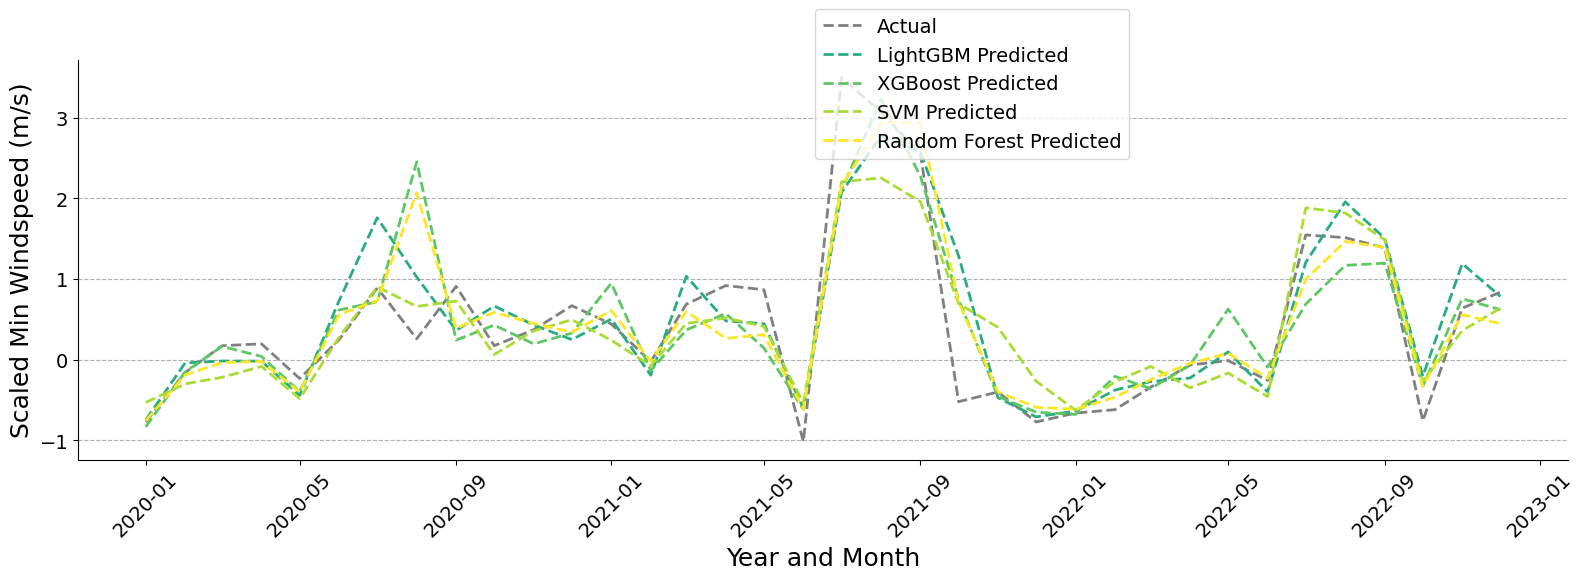

In [101]:

# Model names
models = [
    ('LightGBM', lightgbm_forecast),
    ('XGBoost', xgboost_forecast),
    ('SVM', svm_forecast),
    ('Random Forest', random_forest_forecast)
]

# Clear existing lists in case they contain previous values
model_names.clear()
mae_values.clear()
rmse_values.clear()
r2_values.clear()
nse_values.clear()
willmott_values.clear()

# Iterate over each model, perform walk-forward validation, and append metrics to lists
for model_name, model_func in models:
    mae, rmse, r2, nse, willmott, test_index, y, yhat = walk_forward_validation(data_df, model_func)
    
    model_names.append(model_name)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)
    nse_values.append(nse)
    willmott_values.append(willmott)

# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics_df = pd.DataFrame(metrics)

# Plot the actual vs predicted values for each model
plt.figure(figsize=(16, 6))
plt.plot(test_index, y, label='Actual', linestyle='--', color='gray', linewidth=2)


# Plot predictions for each model
for model_name, model_func in models:
    _, _, _, _, _, test_index, _, yhat = walk_forward_validation(data_df, model_func)
    plt.plot(test_index, yhat, label=f'{model_name} Predicted', linestyle='--', color=colors_dict[model_name], linewidth=2)

plt.xlabel('Year and Month', fontsize=18)
plt.ylabel('Scaled Min Windspeed (m/s)', fontsize=18)
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.6, 1.15), ncol=1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### EVALUATE THE MODEL

In [102]:
# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics = pd.DataFrame(metrics)

In [103]:
metrics

Model       MAE      RMSE  R-squared  Nash-Sutcliffe Efficiency  \
0       LightGBM  0.353623  0.515688   0.750939                   0.750939   
1        XGBoost  0.379456  0.584101   0.680473                   0.680473   
2            SVM  0.340559  0.449444   0.810817                   0.810817   
3  Random Forest  0.321263  0.543103   0.723754                   0.723754   

   Willmott's Index of Agreement  
0                       0.928705  
1                       0.904192  
2                       0.938218  
3                       0.921779

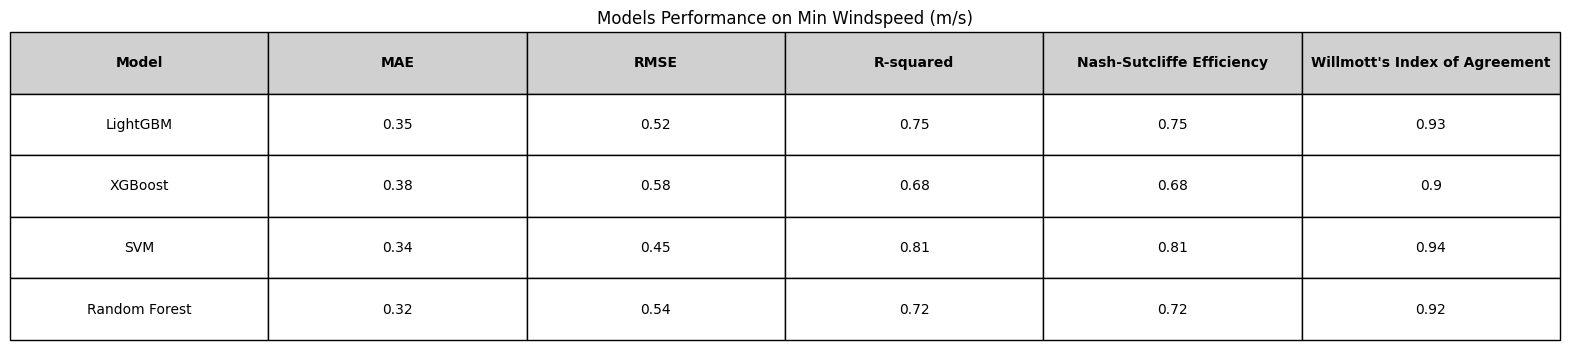

In [104]:
metrics = metrics.round(2)

fig, ax = plt.subplots(figsize=(20, 4))
ax.axis('off')

table = ax.table(cellText=metrics.values,
                 colLabels=metrics.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

header_color = '#D0D0D0'
data_color = '#FFFFFF'

for i, key in enumerate(table._cells):
    cell = table._cells[key]
    cell.set_edgecolor('black')
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(weight='bold')
        cell.set_facecolor(header_color)
    else:
        cell.set_facecolor(data_color)

plt.title('Models Performance on Min Windspeed (m/s)')
plt.show()


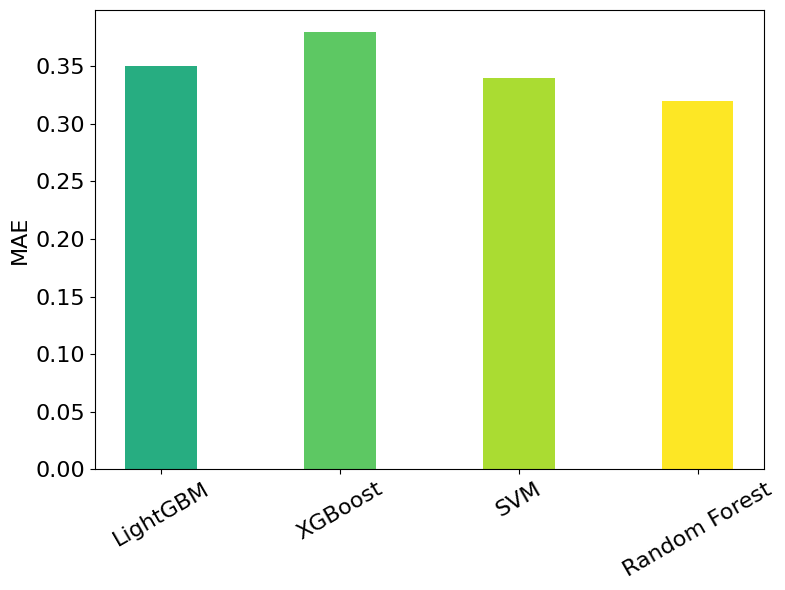

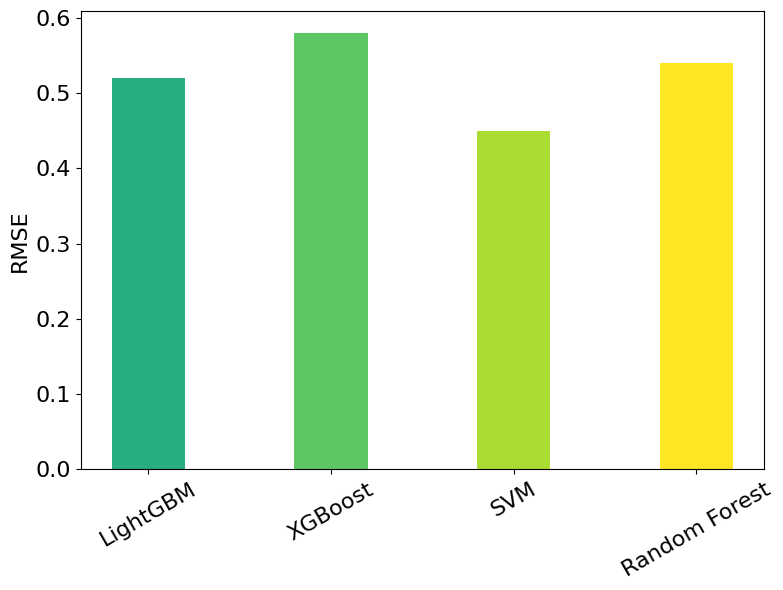

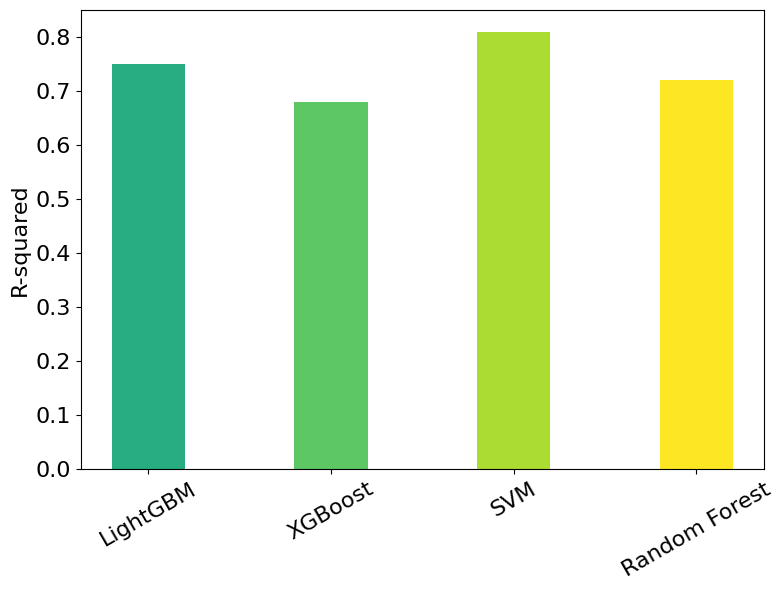

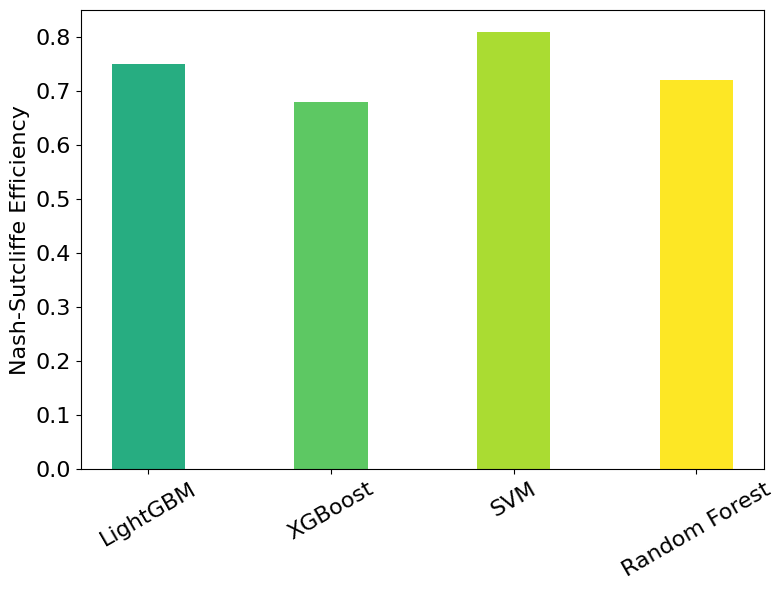

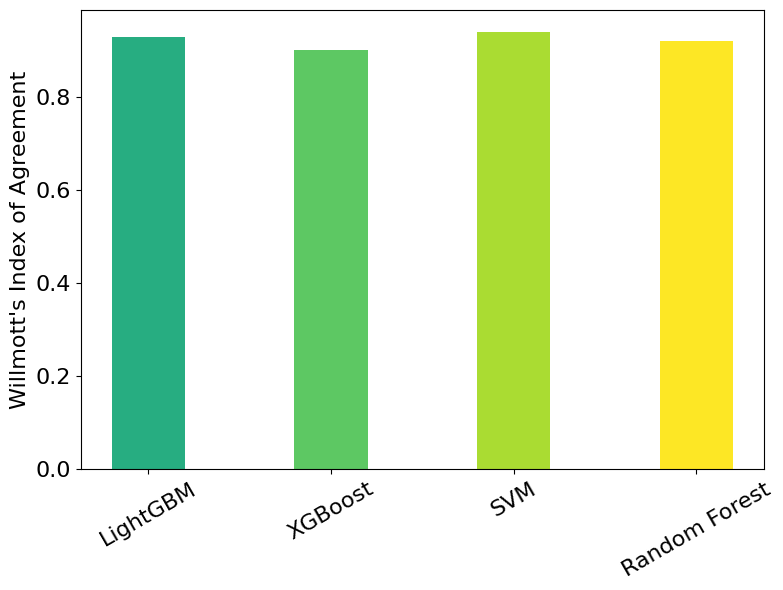

In [105]:

colors = ['#27ad81', '#5dc863', '#aadc32', '#fde725']
bar_width = 0.4

# Metrics and Titles
metrics_title = {
    'MAE': 'Mean Absolute Error (MAE)',
    'RMSE': 'Root Mean Squared Error (RMSE)',
    'R-squared': 'R-squared',
    'Nash-Sutcliffe Efficiency': 'Nash-Sutcliffe Efficiency',
    'Willmott\'s Index of Agreement': 'Willmott\'s Index of Agreement'
}

# Plot each metric separately
for metric, title in metrics_title.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(metrics['Model'], metrics[metric], color=colors, width=bar_width)
    # ax.set_title(title, fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.tick_params(axis='x', rotation=30, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.tight_layout()
    plt.show()


## 11. PRECIPITATION ANALYSIS

In [106]:
# Get the Precipitation values
precipitation = transformed_data[transformed_data['Parameter'] == parameters[-2]]
precipitation.head()

Parameter       Date  Value
150  Precipitation 1993-01-01  31.64
151  Precipitation 1994-01-01   0.00
152  Precipitation 1995-01-01   0.00
153  Precipitation 1996-01-01  47.46
154  Precipitation 1997-01-01  21.09

In [107]:
# drop the parameter columns
precipitation = precipitation.drop(columns=['Parameter'])

In [108]:
precipitation.head()

Date  Value
150 1993-01-01  31.64
151 1994-01-01   0.00
152 1995-01-01   0.00
153 1996-01-01  47.46
154 1997-01-01  21.09

In [109]:
# sort according to  the date
precipitation =precipitation.sort_values(by='Date')
precipitation.head()

Date   Value
150 1993-01-01   31.64
360 1993-02-01   31.64
570 1993-03-01   47.46
780 1993-04-01  221.48
990 1993-05-01  274.22

In [110]:
precipitation.head()

Date   Value
150 1993-01-01   31.64
360 1993-02-01   31.64
570 1993-03-01   47.46
780 1993-04-01  221.48
990 1993-05-01  274.22

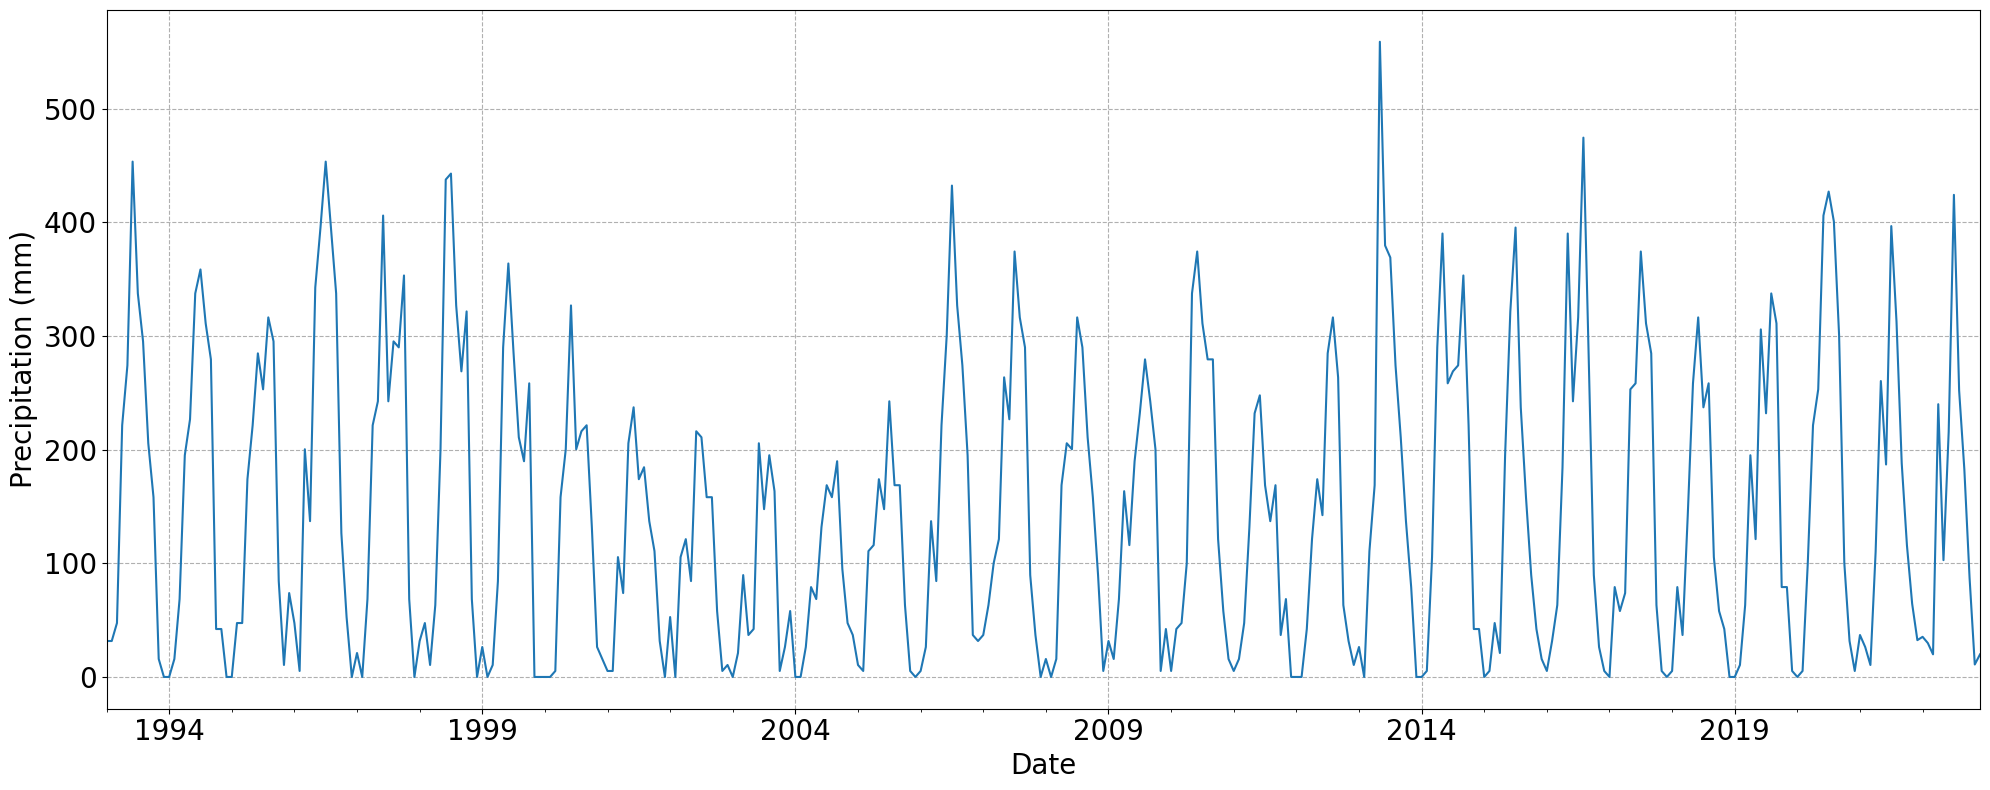

In [111]:
plt.figure(figsize=(20, 8))
precipitation.plot(x='Date', y='Value', kind='line', ax=plt.gca(), color='#1f77b4', fontsize=12)
plt.xlabel('Date', fontdict={'fontsize':20})
plt.ylabel('Precipitation (mm)', fontdict={'fontsize':20})
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(linestyle='--')
plt.tight_layout()
plt.legend().remove()
plt.show()

In [112]:
# Add fuller test to check the stationarity of the dataset
def adfuller_test(values):
    result = adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0)")
    else:
        print("Weak evidence against the null hypothesis(H0)")

In [113]:
# H0: It is non stationary
# H1: It is stationary

In [114]:
adfuller_test(precipitation['Value'])

ADF Test Statistic : -2.6722426886184185
p-value : 0.07896588435537943
#Lags Used : 11
Number of Observations Used : 348
Weak evidence against the null hypothesis(H0)


In [115]:
precipitation = precipitation[['Date', 'Value']]
precipitation.set_index('Date', inplace=True)
precipitation.head()

Value
Date              
1993-01-01   31.64
1993-02-01   31.64
1993-03-01   47.46
1993-04-01  221.48
1993-05-01  274.22

### TRAIN THE MODEL

In [116]:
# Assuming `precipitation` is your time series DataFrame
series = precipitation
values = series.values
values = add_rolling_features(values, window=3)
values = pd.DataFrame(values).values
scaler = StandardScaler()
values = scaler.fit_transform(values)
data = series_to_supervised(values, n_in=6)
data_df = pd.DataFrame(data, index=series.index[6+2:])

>expected=-0.5, predicted=-0.7
>expected=-1.4, predicted=-1.3
>expected=-0.2, predicted=-0.4
>expected=1.0, predicted=0.6
>expected=0.4, predicted=0.7
>expected=0.8, predicted=0.8
>expected=0.7, predicted=1.1
>expected=-1.2, predicted=0.7
>expected=0.0, predicted=-0.2
>expected=2.0, predicted=1.4
>expected=1.7, predicted=2.0
>expected=-0.4, predicted=-0.4
>expected=-1.1, predicted=-1.0
>expected=-1.1, predicted=-1.0
>expected=-1.2, predicted=-0.9
>expected=-0.3, predicted=-0.2
>expected=1.4, predicted=0.9
>expected=0.2, predicted=0.2
>expected=1.0, predicted=0.9
>expected=0.9, predicted=0.4
>expected=0.9, predicted=0.5
>expected=0.8, predicted=0.8
>expected=-0.1, predicted=1.0
>expected=-0.5, predicted=-0.5
>expected=-1.1, predicted=-0.9
>expected=-1.4, predicted=-1.1
>expected=-1.3, predicted=-1.1
>expected=1.4, predicted=0.7
>expected=1.1, predicted=0.8
>expected=0.2, predicted=0.0
>expected=2.3, predicted=0.9
>expected=1.1, predicted=0.2
>expected=1.4, predicted=0.8
>expected=0.4, p

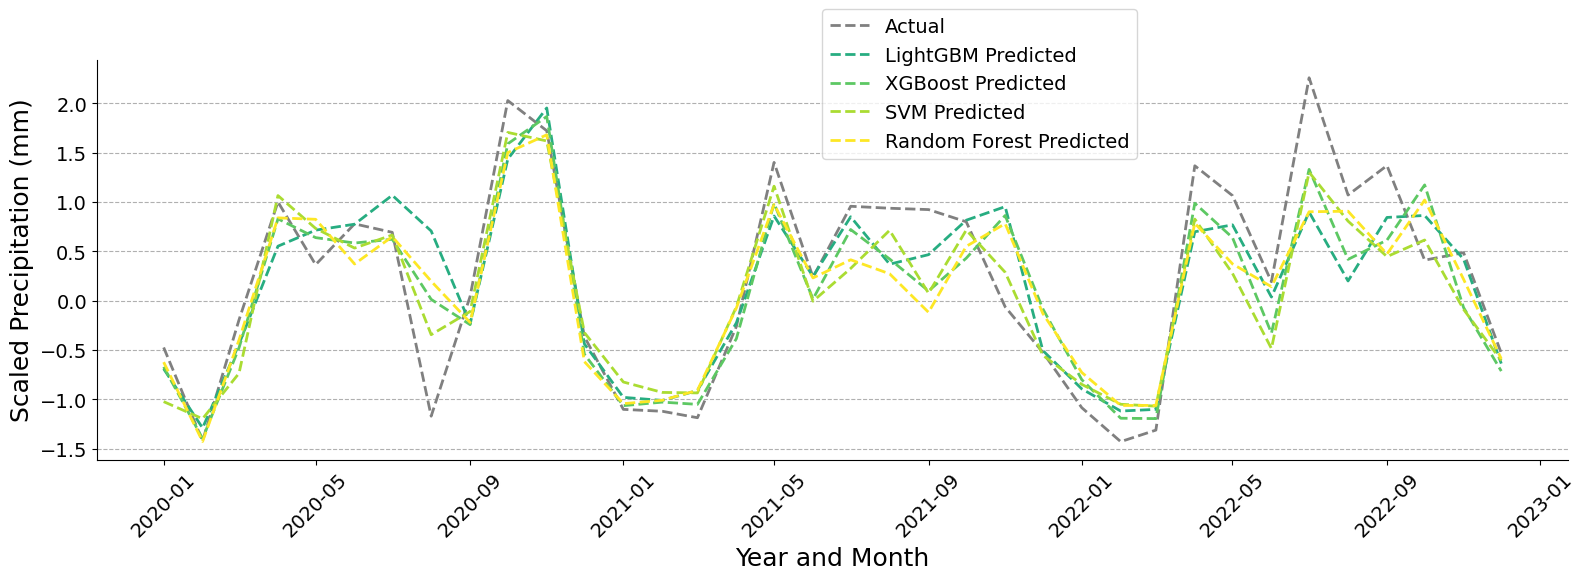

In [117]:

# Model names
models = [
    ('LightGBM', lightgbm_forecast),
    ('XGBoost', xgboost_forecast),
    ('SVM', svm_forecast),
    ('Random Forest', random_forest_forecast)
]

# Clear existing lists in case they contain previous values
model_names.clear()
mae_values.clear()
rmse_values.clear()
r2_values.clear()
nse_values.clear()
willmott_values.clear()

# Iterate over each model, perform walk-forward validation, and append metrics to lists
for model_name, model_func in models:
    mae, rmse, r2, nse, willmott, test_index, y, yhat = walk_forward_validation(data_df, model_func)
    
    model_names.append(model_name)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)
    nse_values.append(nse)
    willmott_values.append(willmott)

# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics_df = pd.DataFrame(metrics)

# Plot the actual vs predicted values for each model
plt.figure(figsize=(16, 6))
plt.plot(test_index, y, label='Actual', linestyle='--', color='gray', linewidth=2)



# Plot predictions for each model
for model_name, model_func in models:
    _, _, _, _, _, test_index, _, yhat = walk_forward_validation(data_df, model_func)
    plt.plot(test_index, yhat, label=f'{model_name} Predicted', linestyle='--', color=colors_dict[model_name], linewidth=2)

plt.xlabel('Year and Month', fontsize=18)
plt.ylabel('Scaled Precipitation (mm)', fontsize=18)
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.6, 1.15), ncol=1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### EVALUATE THE MODEL

In [118]:
# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics = pd.DataFrame(metrics)

In [119]:
metrics

Model       MAE      RMSE  R-squared  Nash-Sutcliffe Efficiency  \
0       LightGBM  0.369776  0.537814   0.723621                   0.723621   
1        XGBoost  0.377248  0.470691   0.788304                   0.788304   
2            SVM  0.358232  0.445320   0.810510                   0.810510   
3  Random Forest  0.394967  0.524570   0.737066                   0.737066   

   Willmott's Index of Agreement  
0                       0.911244  
1                       0.934187  
2                       0.939283  
3                       0.907489

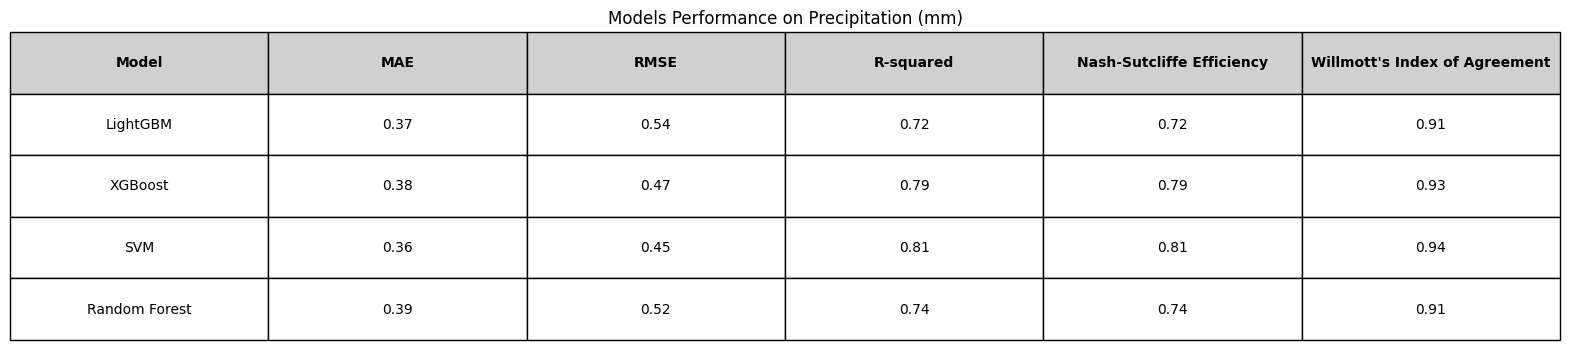

In [120]:
metrics = metrics.round(2)

fig, ax = plt.subplots(figsize=(20, 4))
ax.axis('off')

table = ax.table(cellText=metrics.values,
                 colLabels=metrics.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

header_color = '#D0D0D0'
data_color = '#FFFFFF'

for i, key in enumerate(table._cells):
    cell = table._cells[key]
    cell.set_edgecolor('black')
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(weight='bold')
        cell.set_facecolor(header_color)
    else:
        cell.set_facecolor(data_color)

plt.title('Models Performance on Precipitation (mm)')
plt.show()


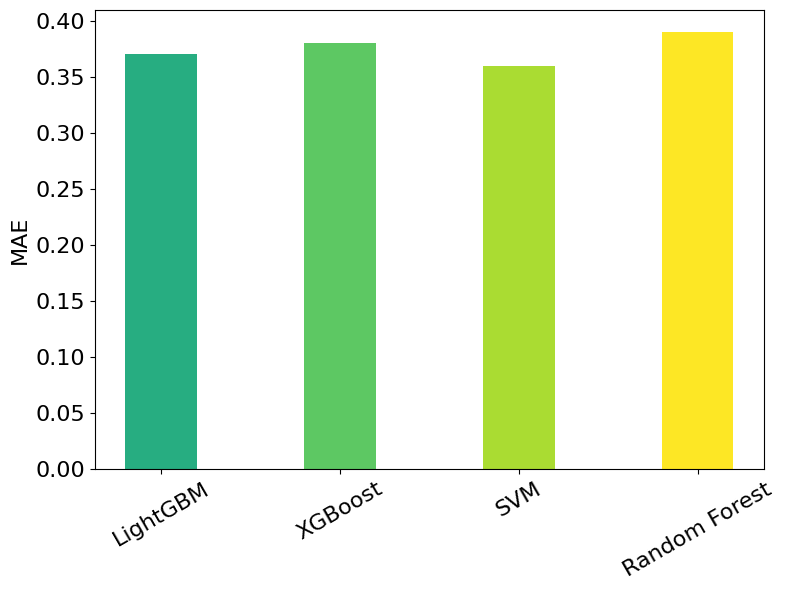

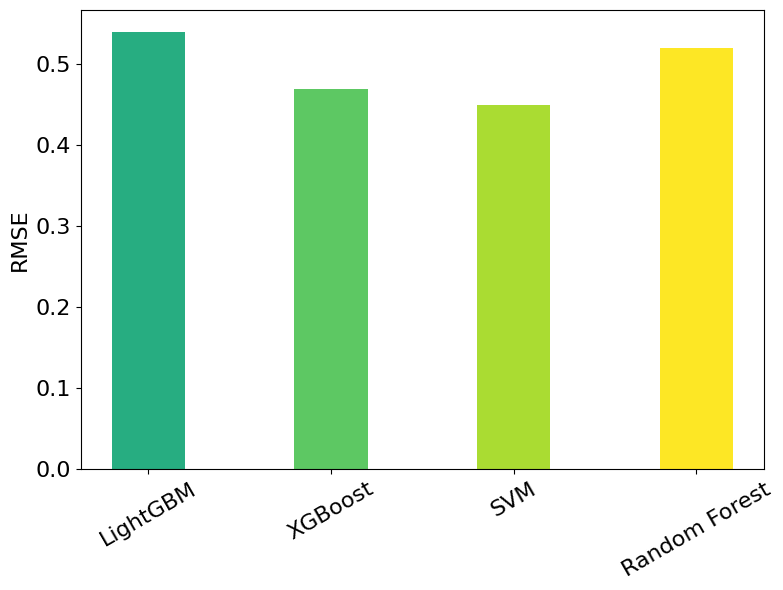

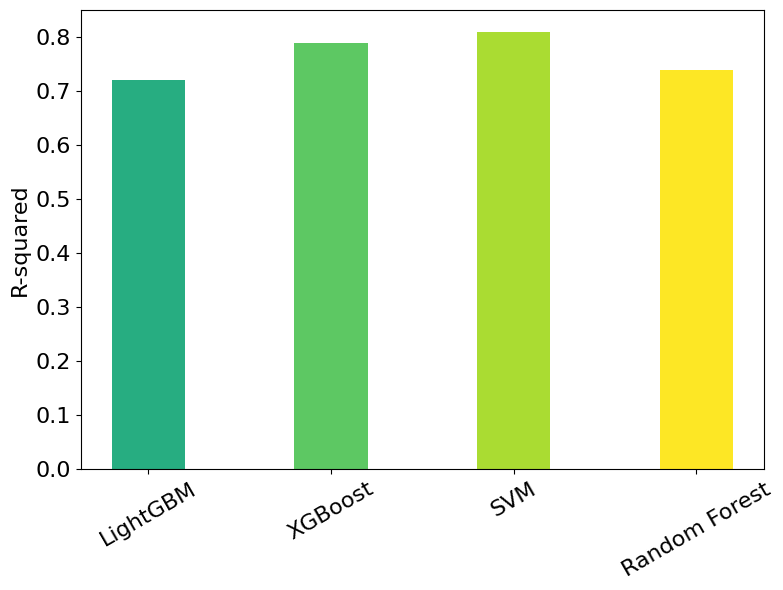

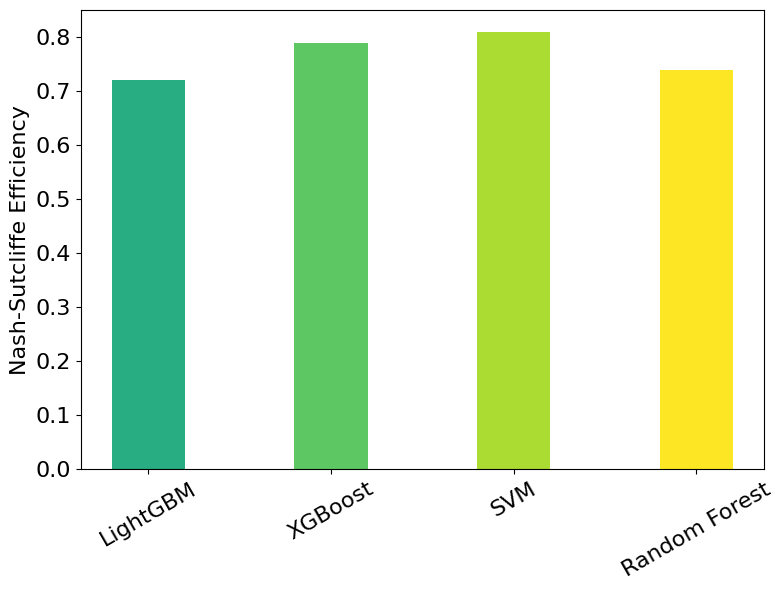

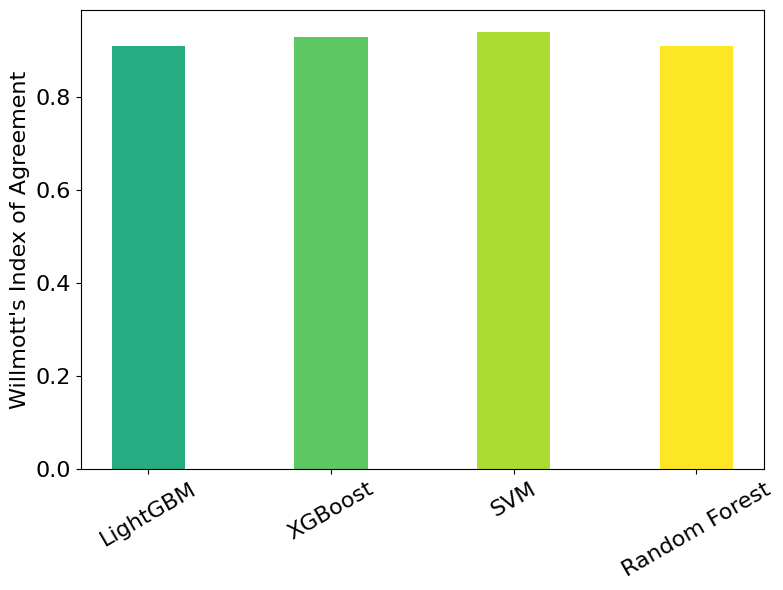

In [121]:

colors = ['#27ad81', '#5dc863', '#aadc32', '#fde725']
bar_width = 0.4

# Metrics and Titles
metrics_title = {
    'MAE': 'Mean Absolute Error (MAE)',
    'RMSE': 'Root Mean Squared Error (RMSE)',
    'R-squared': 'R-squared',
    'Nash-Sutcliffe Efficiency': 'Nash-Sutcliffe Efficiency',
    'Willmott\'s Index of Agreement': 'Willmott\'s Index of Agreement'
}

# Plot each metric separately
for metric, title in metrics_title.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(metrics['Model'], metrics[metric], color=colors, width=bar_width)
    # ax.set_title(title, fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.tick_params(axis='x', rotation=30, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.tight_layout()
    plt.show()


## 12. SOLAR RADIATION

In [122]:
# Get the solar values
solar = transformed_data[transformed_data['Parameter'] == parameters[-1]]
solar.head()

Parameter       Date  Value
180  Solar Radiation 1993-01-01   6.06
181  Solar Radiation 1994-01-01   6.44
182  Solar Radiation 1995-01-01   6.44
183  Solar Radiation 1996-01-01   6.39
184  Solar Radiation 1997-01-01   6.22

In [123]:
# drop the parameter columns
solar = solar.drop(columns=['Parameter'])

In [124]:
solar.head()

Date  Value
180 1993-01-01   6.06
181 1994-01-01   6.44
182 1995-01-01   6.44
183 1996-01-01   6.39
184 1997-01-01   6.22

In [125]:
# sort according to  the date
solar =solar.sort_values(by='Date')
solar.head()

Date  Value
180  1993-01-01   6.06
390  1993-02-01   6.78
600  1993-03-01   7.57
810  1993-04-01   7.86
1020 1993-05-01   7.60

In [126]:
solar.head()

Date  Value
180  1993-01-01   6.06
390  1993-02-01   6.78
600  1993-03-01   7.57
810  1993-04-01   7.86
1020 1993-05-01   7.60

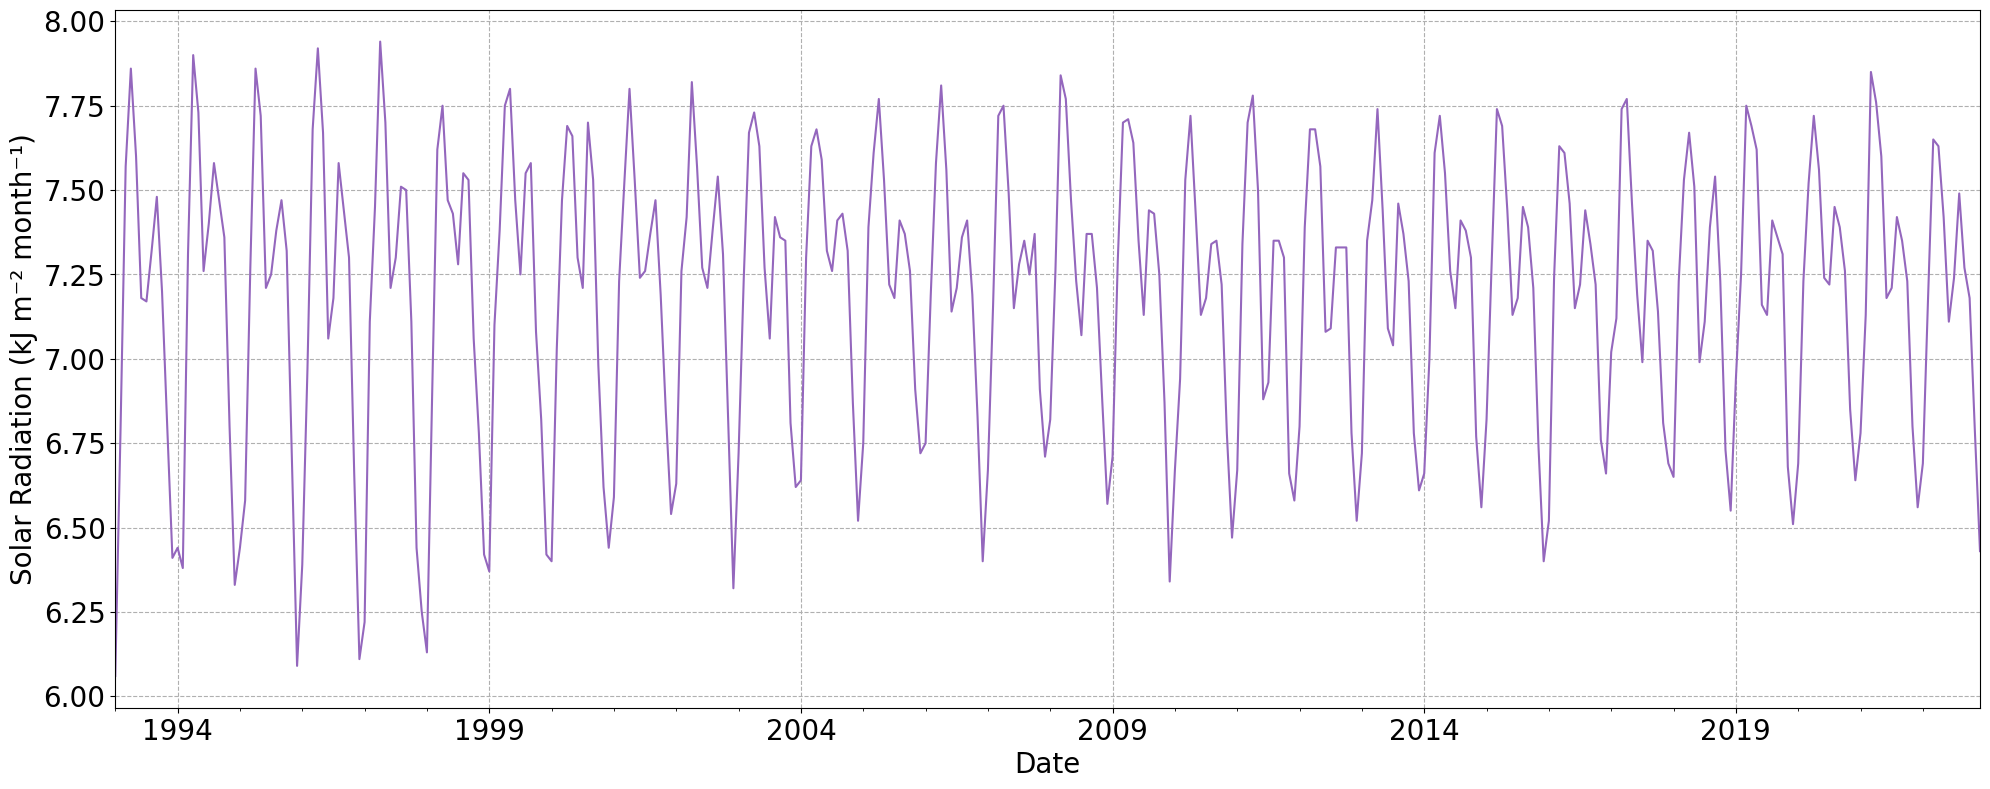

In [127]:
plt.figure(figsize=(20, 8))
solar.plot(x='Date', y='Value', kind='line', ax=plt.gca(), color='#9467bd', fontsize=12)
plt.xlabel('Date', fontdict={'fontsize':20})
plt.ylabel('Solar Radiation (kJ m⁻² month⁻¹)', fontdict={'fontsize':20})
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(linestyle='--')
plt.tight_layout()
plt.legend().remove()
plt.show()

In [128]:
# Add fuller test to check the stationarity of the dataset
def adfuller_test(values):
    result = adfuller(values)
    labels = ['ADF Test Statistic','p-value','#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(H0)")
    else:
        print("Weak evidence against the null hypothesis(H0)")

In [129]:
# H0: It is non stationary
# H1: It is stationary

In [130]:
adfuller_test(solar['Value'])

ADF Test Statistic : -3.864247734515185
p-value : 0.0023143003225489416
#Lags Used : 13
Number of Observations Used : 346
Strong evidence against the null hypothesis(H0)


In [131]:
solar = solar[['Date', 'Value']]
solar.set_index('Date', inplace=True)
solar.head()

Value
Date             
1993-01-01   6.06
1993-02-01   6.78
1993-03-01   7.57
1993-04-01   7.86
1993-05-01   7.60

### TRAIN THE MODEL

In [132]:
# Assuming `solar` is your time series DataFrame
series = solar
values = series.values
values = add_rolling_features(values, window=3)
values = pd.DataFrame(values).values
scaler = StandardScaler()
values = scaler.fit_transform(values)
data = series_to_supervised(values, n_in=6)
data_df = pd.DataFrame(data, index=series.index[6+2:])

>expected=-1.1, predicted=-0.8
>expected=0.8, predicted=0.9
>expected=1.1, predicted=1.6
>expected=-0.1, predicted=0.2
>expected=-1.1, predicted=-1.1
>expected=-0.1, predicted=-0.0
>expected=-0.5, predicted=-0.7
>expected=-1.0, predicted=-1.0
>expected=-1.0, predicted=-0.9
>expected=-1.2, predicted=-1.3
>expected=0.1, predicted=0.3
>expected=0.4, predicted=0.5
>expected=-1.1, predicted=-0.8
>expected=-0.1, predicted=0.1
>expected=2.0, predicted=1.1
>expected=0.9, predicted=0.4
>expected=-1.0, predicted=-0.7
>expected=0.3, predicted=0.3
>expected=-0.2, predicted=-0.3
>expected=-0.9, predicted=-0.8
>expected=-1.1, predicted=-1.0
>expected=-1.2, predicted=-1.3
>expected=0.2, predicted=0.3
>expected=0.5, predicted=0.8
>expected=-1.0, predicted=-0.9
>expected=0.5, predicted=0.8
>expected=1.5, predicted=1.4
>expected=0.0, predicted=-0.2
>expected=-1.0, predicted=-1.3
>expected=-0.0, predicted=0.1
>expected=-0.8, predicted=-0.8
>expected=-0.5, predicted=-0.9
>expected=-0.9, predicted=-1.1
>ex

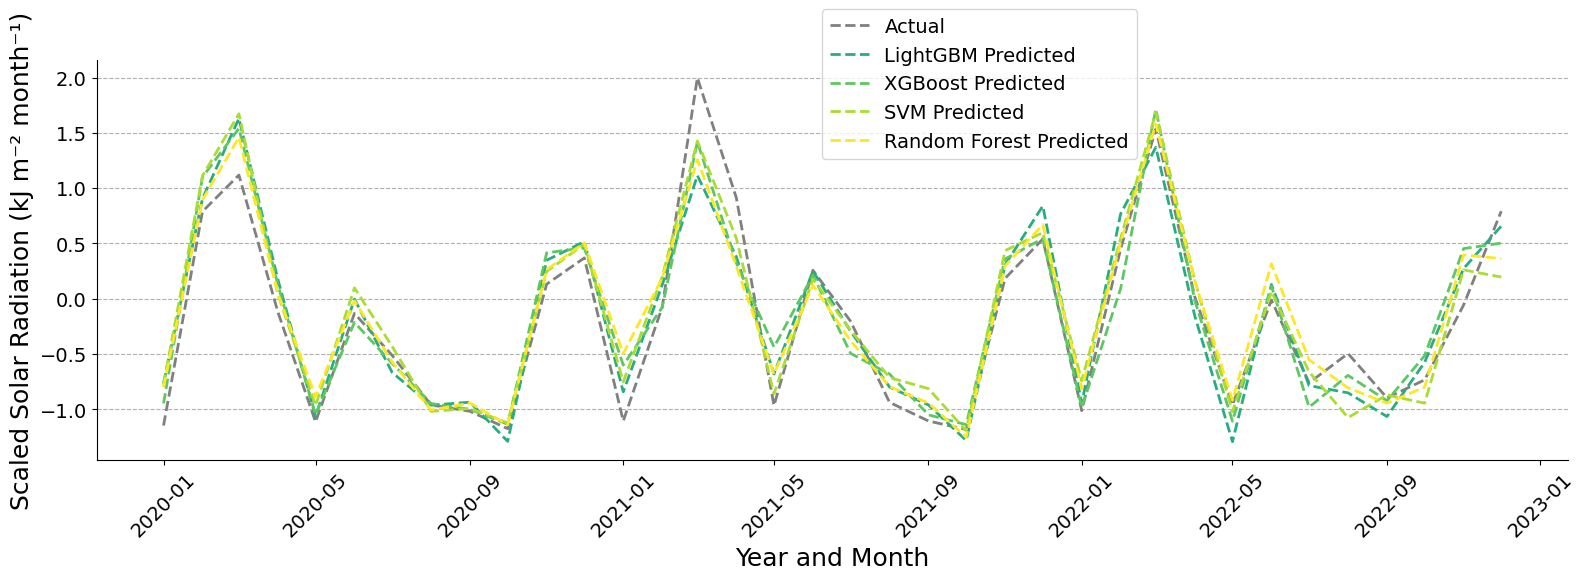

In [133]:

# Model names
models = [
    ('LightGBM', lightgbm_forecast),
    ('XGBoost', xgboost_forecast),
    ('SVM', svm_forecast),
    ('Random Forest', random_forest_forecast)
]

# Clear existing lists in case they contain previous values
model_names.clear()
mae_values.clear()
rmse_values.clear()
r2_values.clear()
nse_values.clear()
willmott_values.clear()

# Iterate over each model, perform walk-forward validation, and append metrics to lists
for model_name, model_func in models:
    mae, rmse, r2, nse, willmott, test_index, y, yhat = walk_forward_validation(data_df, model_func)
    
    model_names.append(model_name)
    mae_values.append(mae)
    rmse_values.append(rmse)
    r2_values.append(r2)
    nse_values.append(nse)
    willmott_values.append(willmott)

# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics_df = pd.DataFrame(metrics)

# Plot the actual vs predicted values for each model
plt.figure(figsize=(16, 6))
plt.plot(test_index, y, label='Actual', linestyle='--', color='gray', linewidth=2)


# Plot predictions for each model
for model_name, model_func in models:
    _, _, _, _, _, test_index, _, yhat = walk_forward_validation(data_df, model_func)
    plt.plot(test_index, yhat, label=f'{model_name} Predicted', linestyle='--', color=colors_dict[model_name], linewidth=2)

plt.xlabel('Year and Month', fontsize=18)
plt.ylabel('Scaled Solar Radiation (kJ m⁻² month⁻¹)', fontsize=18)
plt.legend(fontsize=14, loc='upper center', bbox_to_anchor=(0.6, 1.15), ncol=1)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(axis='y', linestyle='--')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### EVALUATE THE MODEL

In [134]:
# Create a DataFrame
metrics = {
    'Model': model_names,
    'MAE': mae_values,
    'RMSE': rmse_values,
    'R-squared': r2_values,
    'Nash-Sutcliffe Efficiency': nse_values,
    'Willmott\'s Index of Agreement': willmott_values
}

metrics = pd.DataFrame(metrics)

In [135]:
metrics

Model       MAE      RMSE  R-squared  Nash-Sutcliffe Efficiency  \
0       LightGBM  0.212229  0.271846   0.892929                   0.892929   
1        XGBoost  0.201455  0.267171   0.896580                   0.896580   
2            SVM  0.209626  0.266855   0.896825                   0.896825   
3  Random Forest  0.199382  0.279669   0.886678                   0.886678   

   Willmott's Index of Agreement  
0                       0.971720  
1                       0.972394  
2                       0.972934  
3                       0.967615

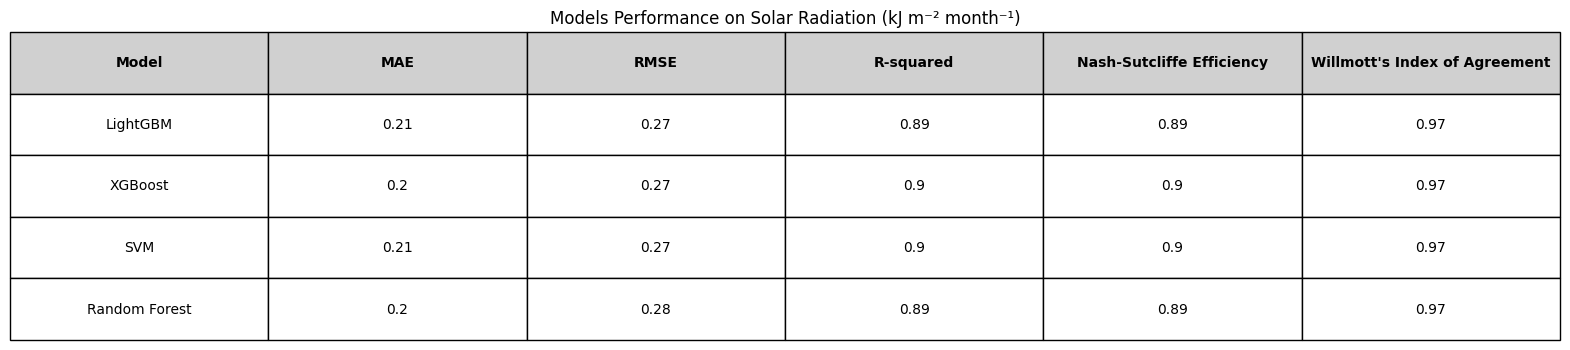

In [136]:
metrics = metrics.round(2)

fig, ax = plt.subplots(figsize=(20, 4))
ax.axis('off')

table = ax.table(cellText=metrics.values,
                 colLabels=metrics.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

header_color = '#D0D0D0'
data_color = '#FFFFFF'

for i, key in enumerate(table._cells):
    cell = table._cells[key]
    cell.set_edgecolor('black')
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(weight='bold')
        cell.set_facecolor(header_color)
    else:
        cell.set_facecolor(data_color)

plt.title('Models Performance on Solar Radiation (kJ m⁻² month⁻¹)')
plt.show()


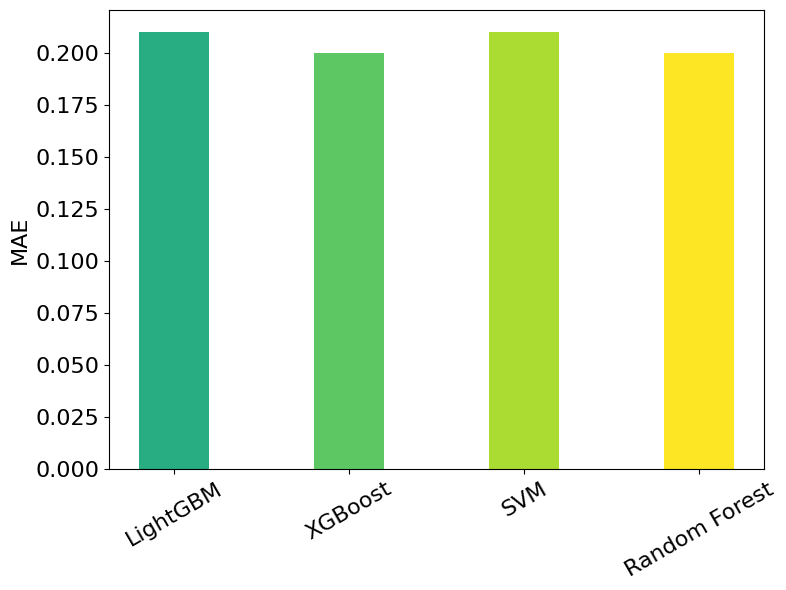

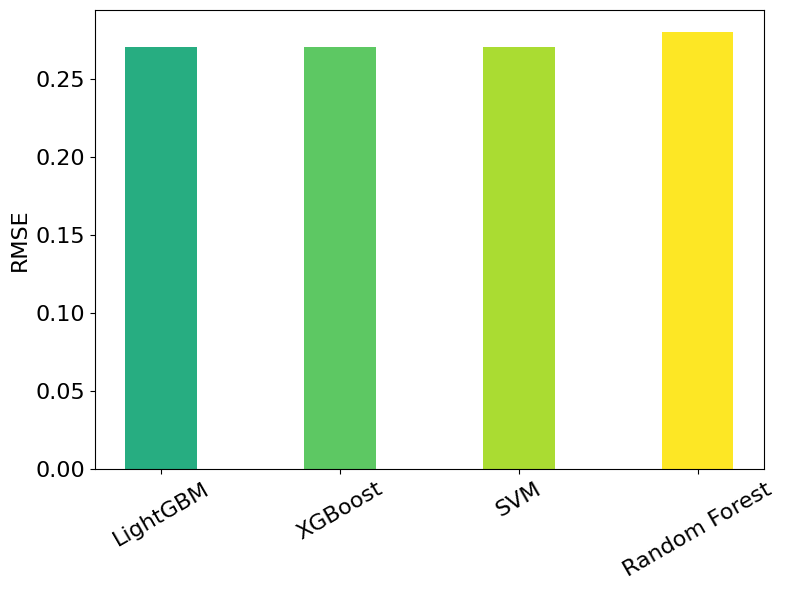

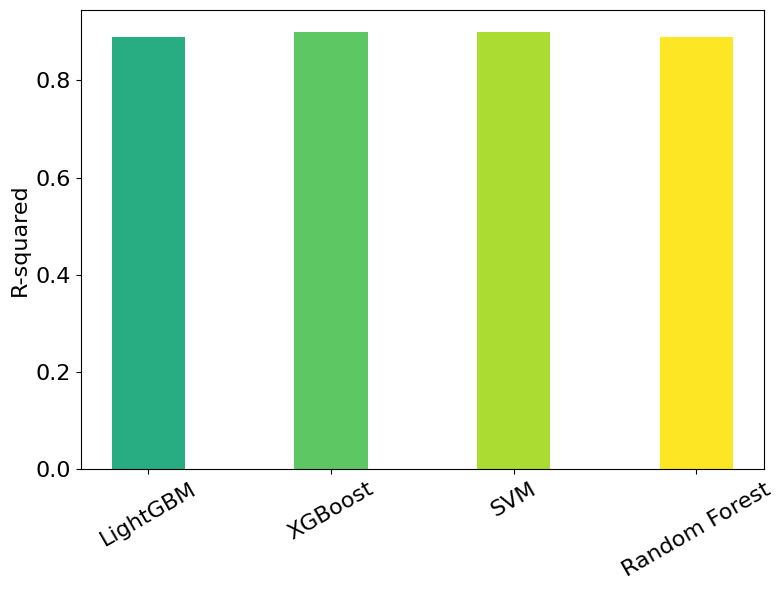

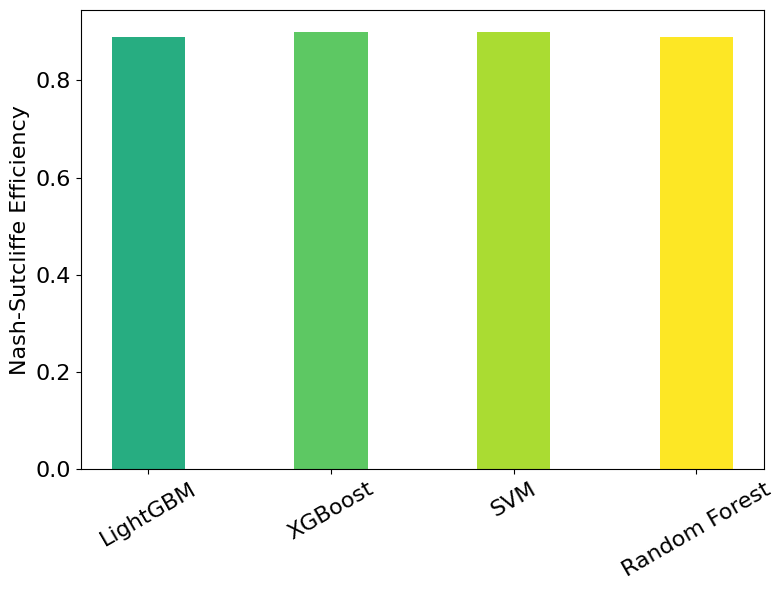

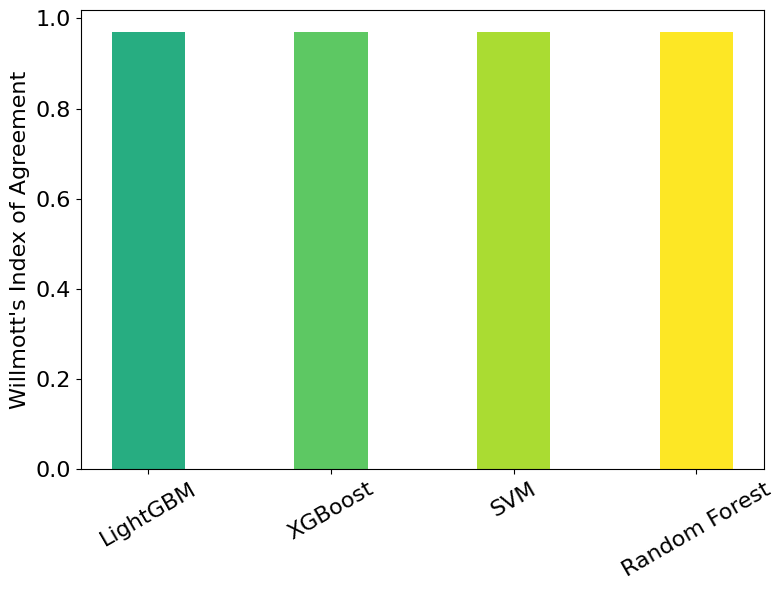

In [137]:

colors = ['#27ad81', '#5dc863', '#aadc32', '#fde725']
bar_width = 0.4

# Metrics and Titles
metrics_title = {
    'MAE': 'Mean Absolute Error (MAE)',
    'RMSE': 'Root Mean Squared Error (RMSE)',
    'R-squared': 'R-squared',
    'Nash-Sutcliffe Efficiency': 'Nash-Sutcliffe Efficiency',
    'Willmott\'s Index of Agreement': 'Willmott\'s Index of Agreement'
}

# Plot each metric separately
for metric, title in metrics_title.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(metrics['Model'], metrics[metric], color=colors, width=bar_width)
    # ax.set_title(title, fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.tick_params(axis='x', rotation=30, labelsize=16)
    ax.tick_params(axis='y', labelsize=16)
    plt.tight_layout()
    plt.show()


## The End